# World Living Cost Prediction (Part 1)

In [23]:
pd.__version__

'1.1.3'

#### World cities living cost data set
The data set contains information for a number of cities related to cost of living index and prices for a number of services and goods related to restaurants, markets, transportation, utilities etc.

Cost of living index is measured against New York city, meaning NYC has a cost index of 100 and the remaining cities get their cost of living index with regards to how much more or less expensive are compared to NYC. Cities where the cost of living index is not available, it has been registered as 0.

Since EU and USA have different currencies the costs have been converted to euro for all the cities in the data set.

Besides the World Living Cost data, we collected cities information such as the latitude, longitude and population from https://simplemaps.com/data/world-cities.

Data Source: The data has been collected using a python web crawler through the www.numbeo.com website.

In this notebook we explore approaches to predicting Cost of Living by using the [Kaggle world cities living cost](https://www.kaggle.com/georgeliarommatis/world-cities-living-cost?select=cities.csv
) dataset and world cities from https://simplemaps.com/data/world-cities.

### Table of Contents:
### [Import required modules](#cell0)
### [Data Cleaning](#cell1)
* [1. Read the Raw Data](#cell2)
* [2. Clean the Data](#cell3)
  * [2.1 Remove Unamed_0 column from df dataframe](#cell4)
  * [2.2 Select the columns from city_df](#cell5)
  * [2.3 Merge two dataframe](#cell6)
  * [2.4 Read Pre-processed Data](#cell7)
  
### [Data Exploration](#cell8)
* [3. Statistic Data](#cell9)
  * [3.1 Describe Statistic](#cell10)
  * [3.2 Pandas Profiling](#cell11)
  * [3.3 Correlation Analysis](#cell12)
* [4. Further Data Exploration](#cell13)
  * [4.1 Top 20 Cities Cost of Living](#cell14)
  * [4.2 Bottom 20 Cities Cost of Living](#cell15)
  * [4.3 Cost of Living Jointplot](#cell16)
  * [4.4 Restaurant Data PairGrid](#cell17)
  * [4.5 Market Data PairGrid](#cell18)
  * [4.6 Transportation Data PairGrid](#cell19)
  * [4.7 Utilities Data PairGrid](#cell20)
  * [4.8 Sports And Leisure Data PairGrid](#cell21)
  * [4.9 Childcare Data PairGrid](#cell22)
  * [4.10 Clothing and Shoes Data PairGrid](#cell23) 
  * [4.11 Rent Apartment(s) Data PairGrid](#cell24) 
  * [4.12 Buy House Data PairGrid](#cell25) 
  * [4.13 Salary Data PairGrid](#cell26) 
  * [4.14 Label-Cost of Living Index](#cell27)
* [5. Other Options for the Treatment of Missing Data](#cell28)
* [Authors](#authors)
  

<a id='cell0'></a>
## Import required modules

In [16]:
import pandas as pd 
import numpy as np  
import pandas_profiling  
import seaborn as sns 
import matplotlib.pyplot as plt

<a id='cell1'></a>

## Data Cleaning

<a id='cell2'></a>

### 1. Read the Raw Data

In [3]:
df=pd.read_csv("./Data/cities_living_cost.csv")
city_df=pd.read_csv('./Data/worldcities.csv')
df.tail()

Unnamed: 0       City  Cost_index  Meal, Inexpensive Restaurant  \
219         127  Jonesboro        0.00                          5.46   
220         128  Baltimore       74.01                         13.65   
221         130     Tacoma       75.52                         11.83   
222         132    Detroit       63.92                         10.01   
223         134     Austin       63.87                         13.65   

     Meal for 2 People, Mid-range Restaurant, Three-course  \
219                                              36.40       
220                                              59.15       
221                                              45.50       
222                                              40.95       
223                                              45.50       

     McMeal at McDonalds (or Equivalent Combo Meal)  \
219                                            6.37   
220                                            6.37   
221                                            8.19   
222                                            6.37   
223                                            6.82   

     Domestic Beer (0.5 liter draught)  Imported Beer (0.33 liter bottle)  \
219                               2.05                               3.64   
220                               5.46                               6.37   
221                               3.64                               5.00   
222                               3.18                               4.55   
223                               3.64                               5.46   

     Cappuccino (regular)  Coke/Pepsi (0.33 liter bottle)  ...  \
219                  3.94                            1.29  ...   
220                  3.51                            1.76  ...   
221                  3.89                            1.63  ...   
222                  3.37                            1.67  ...   
223                  3.88                            1.77  ...   

     1 Summer Dress in a Chain Store (Zara, H&M, ...)  \
219                                             34.12   
220                                             27.30   
221                                             34.40   
222                                             29.48   
223                                             33.34   

     1 Pair of Nike Running Shoes (Mid-Range)  \
219                                     57.63   
220                                     73.55   
221                                     73.08   
222                                     73.66   
223                                     71.35   

     1 Pair of Men Leather Business Shoes  \
219                                 93.73   
220                                 93.67   
221                                 98.46   
222                                 80.76   
223                                 79.64   

     Apartment (1 bedroom) in City Centre  \
219                                773.50   
220                               1364.87   
221                               1223.40   
222                               1300.77   
223                               1568.53   

     Apartment (1 bedroom) Outside of Centre  \
219                                   606.67   
220                                   954.53   
221                                  1071.45   
222                                   793.58   
223                                  1005.85   

     Apartment (3 bedrooms) in City Centre  \
219                                1274.00   
220                                2110.06   
221                                2044.25   
222                                2229.50   
223                                2811.59   

     Apartment (3 bedrooms) Outside of Centre  \
219                                   1057.07   
220                                   1618.50   
221                                   1616.77   
222                                   1297.73   
223              

<a id='cell3'></a>

### 2. Clean the Data

<a id='cell4'></a>
#### 2. 1 Remove Unamed_0 column from df dataframe

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.tail()

City  Cost_index  Meal, Inexpensive Restaurant  \
219  Jonesboro        0.00                          5.46   
220  Baltimore       74.01                         13.65   
221     Tacoma       75.52                         11.83   
222    Detroit       63.92                         10.01   
223     Austin       63.87                         13.65   

     Meal for 2 People, Mid-range Restaurant, Three-course  \
219                                              36.40       
220                                              59.15       
221                                              45.50       
222                                              40.95       
223                                              45.50       

     McMeal at McDonalds (or Equivalent Combo Meal)  \
219                                            6.37   
220                                            6.37   
221                                            8.19   
222                                            6.37   
223                                            6.82   

     Domestic Beer (0.5 liter draught)  Imported Beer (0.33 liter bottle)  \
219                               2.05                               3.64   
220                               5.46                               6.37   
221                               3.64                               5.00   
222                               3.18                               4.55   
223                               3.64                               5.46   

     Cappuccino (regular)  Coke/Pepsi (0.33 liter bottle)  \
219                  3.94                            1.29   
220                  3.51                            1.76   
221                  3.89                            1.63   
222                  3.37                            1.67   
223                  3.88                            1.77   

     Milk (regular), (1 liter)  ...  \
219                       0.75  ...   
220                       0.76  ...   
221                       0.76  ...   
222                       0.57  ...   
223                       0.74  ...   

     1 Summer Dress in a Chain Store (Zara, H&M, ...)  \
219                                             34.12   
220                                             27.30   
221                                             34.40   
222                                             29.48   
223                                             33.34   

     1 Pair of Nike Running Shoes (Mid-Range)  \
219                                     57.63   
220                                     73.55   
221                                     73.08   
222                                     73.66   
223                                     71.35   

     1 Pair of Men Leather Business Shoes  \
219                                 93.73   
220                                 93.67   
221                                 98.46   
222                                 80.76   
223                                 79.64   

     Apartment (1 bedroom) in City Centre  \
219                                773.50   
220                               1364.87   
221                               1223.40   
222                               1300.77   
223                               1568.53   

     Apartment (1 bedroom) Outside of Centre  \
219                                   606.67   
220                                   954.53   
221                                  1071.45   
222                                   793.58   
223                                  1005.85   

     Apartment (3 bedrooms) in City Centre  \
219                                1274.00   
220                                2110.06   
221                                2044.25   
222                                2229.50   
223                                2811.59   

     Apartment (3 bedrooms) Outside of Centre  \
219                                   1057.07   
220                                 

In [7]:
# check null counts of cities_living_cost
df.isnull().sum()

City                                                                        0
Cost_index                                                                  0
Meal, Inexpensive Restaurant                                                0
Meal for 2 People, Mid-range Restaurant, Three-course                       0
McMeal at McDonalds (or Equivalent Combo Meal)                              0
Domestic Beer (0.5 liter draught)                                           0
Imported Beer (0.33 liter bottle)                                           0
Cappuccino (regular)                                                        0
Coke/Pepsi (0.33 liter bottle)                                              0
Milk (regular), (1 liter)                                                   0
Loaf of Fresh White Bread (500g)                                            0
Rice (white), (1kg)                                                         0
Eggs (regular) (12)                                             

In [8]:
# Sample city data
city_df.head()

city   city_ascii      lat       lng        country iso2 iso3  \
0        Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1     New York     New York  40.6943  -73.9249  United States   US  USA   
2  Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3       Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4    São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   

         admin_name  capital  population          id  
0             Tōkyō  primary  35676000.0  1392685764  
1          New York      NaN  19354922.0  1840034016  
2  Ciudad de México  primary  19028000.0  1484247881  
3       Mahārāshtra    admin  18978000.0  1356226629  
4         São Paulo    admin  18845000.0  1076532519

<a id='cell5'></a>
#### 2. 2 Select the columns from city_df

In [9]:
city_df = city_df[['city_ascii','lat','lng','country','iso3','admin_name','population']]
city_df.tail()

city_ascii      lat       lng    country iso3          admin_name  \
15488  Timmiarmiut  62.5333  -42.2167  Greenland  GRL            Kujalleq   
15489  Cheremoshna  51.3894   30.0989    Ukraine  UKR   Kyyivs’ka Oblast’   
15490    Ambarchik  69.6510  162.3336     Russia  RUS    Sakha (Yakutiya)   
15491      Nordvik  74.0165  111.5100     Russia  RUS  Krasnoyarskiy Kray   
15492      Ennadai  61.1333 -100.8833     Canada  CAN             Nunavut   

       population  
15488        10.0  
15489         0.0  
15490         0.0  
15491         0.0  
15492         0.0

In [10]:
city_df.isnull().sum()

city_ascii       0
lat              0
lng              0
country          0
iso3             0
admin_name     191
population    1685
dtype: int64

<a id='cell6'></a>
#### 2. 3 Merge two dataframe

In [13]:
merged_df = df.merge(city_df, how='left', left_on='City', right_on='city_ascii')
merged_df.to_csv("city_geo_cost.csv", index=False)
merged_df.head(5)

City  Cost_index  Meal, Inexpensive Restaurant  \
0  Turin       65.63                          15.0   
1  Milan       75.78                          15.0   
2  Milan       75.78                          15.0   
3  Milan       75.78                          15.0   
4  Milan       75.78                          15.0   

   Meal for 2 People, Mid-range Restaurant, Three-course  \
0                                               60.0       
1                                               60.0       
2                                               60.0       
3                                               60.0       
4                                               60.0       

   McMeal at McDonalds (or Equivalent Combo Meal)  \
0                                             8.0   
1                                             8.0   
2                                             8.0   
3                                             8.0   
4                                             8.0   

   Domestic Beer (0.5 liter draught)  Imported Beer (0.33 liter bottle)  \
0                                4.0                                4.0   
1                                5.0                                5.0   
2                                5.0                                5.0   
3                                5.0                                5.0   
4                                5.0                                5.0   

   Cappuccino (regular)  Coke/Pepsi (0.33 liter bottle)  \
0                  1.41                            1.98   
1                  1.51                            2.54   
2                  1.51                            2.54   
3                  1.51                            2.54   
4                  1.51                            2.54   

   Milk (regular), (1 liter)  ...  \
0                       1.10  ...   
1                       1.23  ...   
2                       1.23  ...   
3                       1.23  ...   
4                       1.23  ...   

   Price per Square Meter to Buy Apartment in City Centre  \
0                                            3435.42        
1                                            8549.13        
2                                            8549.13        
3                                            8549.13        
4                                            8549.13        

   Price per Square Meter to Buy Apartment Outside of Centre  \
0                                            1976.00           
1                                            3786.26           
2                                            3786.26           
3                                            3786.26           
4                                            3786.26           

   Average Monthly Net Salary (After Tax)  city_ascii      lat      lng  \
0                                 1413.44       Turin  45.0704   7.6700   
1                                 1651.84       Milan  45.4700   9.2050   
2                                 1651.84       Milan  42.0815 -83.6854   
3                                 1651.84       Milan  35.9126 -88.7554   
4                                 1651.84       Milan  41.4416 -90.5595   

         country  iso3  admin_name  population  
0          Italy   ITA    Piedmont   1652000.0  
1          Italy   ITA    Lombardy   2945000.0  
2  United States   USA    Michigan      7787.0  
3  United States   USA   Tennessee      7253.0  
4  United States   USA    Illinois      5061.0  

[5 rows x 62 columns]

### After Cost of Living merging with city dataframe, we found the following data issues and our data cleaning solutions.
1. <Problem-1:> multiple cities with same city name. <Solution-1:> refer back to www.numbeo.com. Find the matching, or close to match data and remove the cities not available from www.numbeo.com.
2. <Problem-2:> some cities are missing latitude, longitude, and population data. <Solution-2:> Google search and manually filled in total 10 cities' geographic data.
3. <Problem-3:> 5 cities in Canada and 1 city in Australian used the different currency other than euro. <Solution-3:> 1 Euro equals = 1.63 Australian Dollar & 1 Euro equals = 1.57 Canadian Dollar to recalucate the data
4. <Problem-4:> Special characters in the location <Solution-4:> remove unnecessary columns with special characters
5. <Problem-5:> Duplicated the labels <Solution-5:> after the validation on www.numbeo.com, the duplicated labels are belonged to two different categories' data. We did relabelling.

<a id='cell7'></a>
#### 2. 4 Read Pre-processed Data

In [14]:
df = pd.read_csv("./Data/city_geo_cost_v4.csv")
df.head()

City  Cost_index  Rst_MealInexpensiveRestaurant  \
0     Turin       65.63                           15.0   
1     Milan       75.78                           15.0   
2  Chemnitz        0.00                            8.5   
3    Dublin       77.85                           15.0   
4      Bonn       66.01                            9.5   

   Rst_Mealfor2People_Mid-rangeRestaurantThree-course  Rst_McMealatMcDonalds  \
0                                               60.0                    8.00   
1                                               60.0                    8.00   
2                                               40.0                    7.75   
3                                               62.5                    8.50   
4                                               55.0                    7.50   

   Rst_DomesticBeerhalfliter  Rst_ImportedBeerOneThirdliterbottle  \
0                       4.00                                 4.00   
1                       5.00                                 5.00   
2                       3.00                                 3.75   
3                       5.75                                 6.00   
4                       3.50                                 3.50   

   Rst_Cappuccinoregular  Rst_CokePepsiOneThirdliterbottle  \
0                   1.41                              1.98   
1                   1.51                              2.54   
2                   3.00                              2.08   
3                   3.29                              1.86   
4                   2.61                              2.06   

   Mkt_Milkregular1liter  ...  Rent_Apartment3bedroomsinCityCentre  \
0                   1.10  ...                              1107.24   
1                   1.23  ...                              2507.87   
2                   0.68  ...                               850.00   
3                   0.97  ...                              3035.56   
4                   0.74  ...                              1507.69   

   Rent_Apartment3bedroomsOutsideofCentre  \
0                                  765.17   
1                                 1514.29   
2                                  675.00   
3                                 2372.22   
4                                 1138.46   

   BuyHouse_PriceperSquareMetertoBuyApartmentinCityCentre  \
0                                            3435.42        
1                                            8549.13        
2                                            3000.00        
3                                            5587.01        
4                                            7433.33        

   BuyHouse_PriceperSquareMetertoBuyApartmentOutsideofCentre  \
0                                            1976.00           
1                                            3786.26           
2                                            1516.67           
3                                            4026.59           
4                                            4933.33           

   Sal_AverageMonthlyNetSalaryAfterTax      lat      lng  country  iso3  \
0                              1413.44  45.0704   7.6700    Italy   ITA   
1                              1651.84  45.4700   9.2050    Italy   ITA   
2                              1962.50  50.8300  12.9200  Germany   DEU   
3                              2490.81  53.3331  -6.2489  Ireland   IRL   
4                              2431.83  50.7205   7.0800  Germany   DEU   

   population  
0     1652000  
1     2945000  
2      302643  
3     1059000  
4      680543  

[5 rows x 60 columns]

<a id='cell8'></a>
##  Data Exploration

<a id='cell9'></a>
### 3. Statistic Data

<a id='cell10'></a>
#### 3.1 Describe Statistic

In [18]:
df.describe()

Cost_index  Rst_MealInexpensiveRestaurant  \
count  224.000000                     224.000000   
mean    53.453482                      16.803170   
std     29.715099                      72.220719   
min      0.000000                       4.550000   
25%     48.125000                      10.000000   
50%     66.125000                      12.000000   
75%     72.832500                      13.650000   
max     98.310000                    1092.000000   

       Rst_Mealfor2People_Mid-rangeRestaurantThree-course  \
count                                         224.000000    
mean                                           90.092991    
std                                           604.811621    
min                                            21.840000    
25%                                            40.030000    
50%                                            50.000000    
75%                                            60.000000    
max                                          9100.000000    

       Rst_McMealatMcDonalds  Rst_DomesticBeerhalfliter  \
count             224.000000                 224.000000   
mean               12.904821                   5.840804   
std                84.645103                  27.116858   
min                 3.000000                   1.200000   
25%                 6.820000                   3.180000   
50%                 7.280000                   4.000000   
75%                 8.000000                   5.000000   
max              1274.000000                 409.500000   

       Rst_ImportedBeerOneThirdliterbottle  Rst_Cappuccinoregular  \
count                           224.000000             224.000000   
mean                              7.352277               6.455402   
std                              42.281451              51.007073   
min                               1.650000               1.010000   
25%                               3.500000               2.427500   
50%                               4.550000               3.180000   
75%                               5.460000               3.832500   
max                             637.000000             766.310000   

       Rst_CokePepsiOneThirdliterbottle  Mkt_Milkregular1liter  \
count                        224.000000             224.000000   
mean                           2.852723               2.419866   
std                           14.245585              23.658059   
min                            0.970000               0.360000   
25%                            1.600000               0.680000   
50%                            1.820000               0.815000   
75%                            2.200000               0.940000   
max                          215.000000             354.900000   

       Mkt_LoafofFreshWhiteBread500g  ...  Rent_Apartment1bedroominCityCentre  \
count                     224.000000  ...                          224.000000   
mean                        2.910982  ...                         1131.207098   
std                        15.447987  ...                         2936.702460   
min                         0.530000  ...                          218.670000   
25%                         1.270000  ...                          609.477500   
50%                         1.805000  ...                          821.255000   
75%                         2.395000  ...                         1141.105000   
max                       232.810000  ...                        44362.500000   

       Rent_Apartment1bedroomOutsideofCentre  \
count                             224.000000   
mean                              865.689554   
std                              1925.737570   
min                               185.420000   
25%                               484.275000   
50%                               646.975000   
75%                               882.217500   
max                             29006.250000   

       Rent_Apartment3bedroomsinCityCentre  \
count                         

### Findings from Describe Statistic
1. There are some entries without target prediction (Cost_index min is 0) --- These entries will be removed from test, training dataset.
2. There is a clear outlier in the dataset. (Meal, Inexpensive Restaurant is 1092 Euro) --- This entry will be removed from test, traing dataset.

<a id='cell11'></a>
#### 3.2 Pandas Profiling

In [19]:
profile = df.profile_report(title='Living Cost Dataset Quality Analysis Report -- October 10, 2020')
profile.to_file(output_file="Living_Cost_Quality_Analysis_Oct_10_2020.html")

<a id='cell11'></a>
#### 3.3 Correlation Analysis

In [12]:
df = df[df['Cost_index'] !=0]
df = df[df['Rst_MealInexpensiveRestaurant'] !=1092]
costIndex_corr = df.corr()
costIndex_corr

Cost_index  \
Cost_index                                            1.000000   
Rst_MealInexpensiveRestaurant                         0.736696   
Rst_Mealfor2People_Mid-rangeRestaurantThree-course    0.687405   
Rst_McMealatMcDonalds                                 0.431720   
Rst_DomesticBeerhalfliter                             0.654756   
Rst_ImportedBeerOneThirdliterbottle                   0.662513   
Rst_Cappuccinoregular                                 0.473226   
Rst_CokePepsiOneThirdliterbottle                      0.268213   
Mkt_Milkregular1liter                                 0.200475   
Mkt_LoafofFreshWhiteBread500g                         0.706532   
Mkt_Ricewhite1kg                                      0.614074   
Mkt_Eggsregular12                                     0.451393   
Mkt_LocalCheese1kg                                    0.540987   
Mkt_ChickenFillets1kg                                 0.620911   
Mkt_BeefRound1kgBackLegRedMeat                        0.486015   
Mkt_Apples1kg                                         0.629147   
Mkt_Banana1kg                                         0.418556   
Mkt_Oranges1kg                                        0.610066   
Mkt_Tomato1kg                                         0.650286   
Mkt_Potato1kg                                         0.556017   
Mkt_Onion1kg                                          0.607377   
Mkt_Lettuce1head                                      0.551434   
Mkt_WaterOneandHalfliterbottle                        0.521249   
Mkt_BottleofWineMid-Range                             0.525810   
Mkt_DomesticBeerHalfliterbottle                       0.464482   
Mkt_ImportedBeerOneThirdliterbottle                   0.410767   
Mkt_Cigarettes20PackMarlboro                          0.443113   
Trsp_One-wayTicket                                    0.274752   
Trsp_MonthlyPassTransportation                        0.410188   
Trsp_TaxiStart                                        0.204173   
Trsp_Taxi1km                                          0.442902   
Trsp_Taxi1hourWaiting                                 0.451240   
Trsp_Gasoline1liter                                  -0.259770   
Trsp_VolkswagenGolf1490KWTrendline                    0.316289   
Trsp_ToyotaCorollaSedan16l97kWComfort                 0.205773   
Uty_BasicElectricityHeatingCoolingWaterGarbage        0.067067   
Uty_1minofPrepaidMobileTariffLocal_NoDiscounts        0.069475   
Uty_Internet60MbpsorMoreUnlimitedDataCable            0.506153   
SptEnt_FitnessClubMonthlyFeefor1Adult                 0.379080   
SptEnt_TennisCourtRent1HouronWeekend                  0.163636   
SptEnt_CinemaInternationalRelease1Seat                0.648074   
ChCare_PreschoolFullDayPrivateMonthlyfor1Child        0.593530   
ChCare_InternationalPrimarySchoolYearlyfor1Child      0.377524   
Cloth_1PairofJeans_Levis501                          -0.168389   
Cloth_1ummerDressinaChainStore_Zara                   0.124506   
Cloth_1PairofNikeRunningShoesMid-Range                0.157110   
Cloth_1PairofMenLeatherBusinessShoes                  0.251510   
Rent_Apartment1bedroominCityCentre                    0.638765   
Rent_Apartment1bedroomOutsideofCentre                 0.645600   
Rent_Apartment3bedroomsinCityCentre                   0.675026   
Rent_Apartment3bedroomsOutsideofCentre                0.706065   
BuyHouse_PriceperSquareMetertoBuyApartmentinCit...    0.302411   
BuyHouse_PriceperSquareMetertoBuyApartmentOutsi...    0.277218   
Sal_AverageMonthlyNetSalaryAfterTax                   0.623738   
lat                                                  -0.053522   
lng                                                  -0.404015   
population                                            0.178446   

                                                    Rst_MealInexpensiveRestaurant  \
Cost_index                                                               0.736696   
Rst_MealInexpensiveRestaurant                        

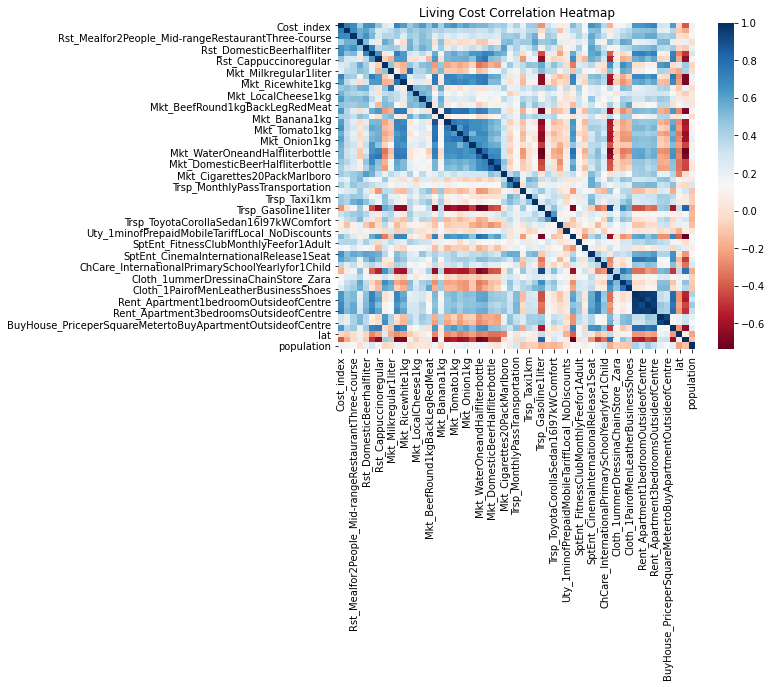

In [13]:
plt.figure(figsize=(8, 6))
heat_map = sns.heatmap(costIndex_corr,cmap='RdBu')
heat_map.set_title('Living Cost Correlation Heatmap')

plt.show()

fig = heat_map.get_figure()
fig.savefig("Living_Cost_Corr_heapmap.jpg") 

<a id='cell13'></a>
### Further Data Exploration
1. Ranking -- Top 20 and Bottom 20
2. Each feature distribution chart, and regression analysis with cost index
3. Category Data Analysis, the goal is to elimate highly coorelated features during modeling.


<a id='cell14'></a>
#### 4.1 Top 20 Cities Cost of Living

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


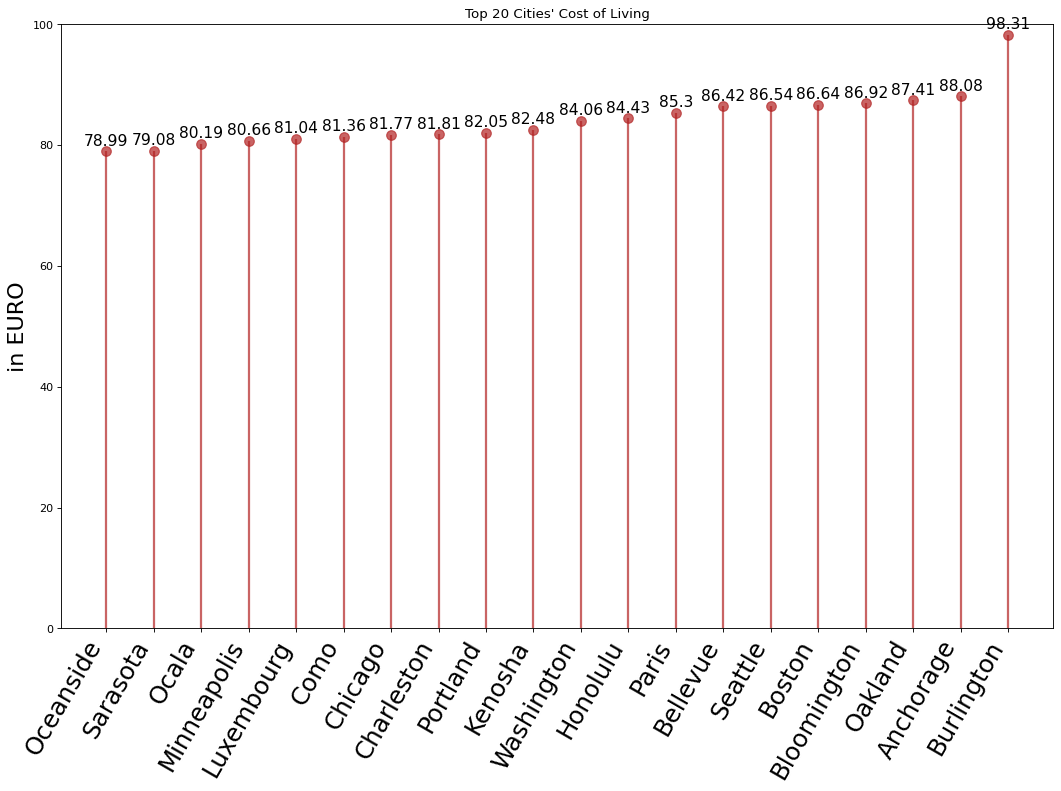

In [14]:
df1 = df[['Cost_index', 'City','country','population']]
df1.sort_values('Cost_index', inplace=True)
df1.reset_index(inplace=True)
df2 = df1.tail(20)
df2 = df2[['Cost_index', 'City']]
df2.sort_values('Cost_index', inplace=True)
df2.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df2.index, ymin=0, ymax=df2.Cost_index, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df2.index, y=df2.Cost_index, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 20 Cities\' Cost of Living', fontdict={'size':12})
ax.set_ylabel('in EURO',fontdict={'size':20})
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.City, rotation=60, fontdict={'horizontalalignment': 'right', 'size':22})
ax.set_ylim(0, 100)

# Annotate
for row in df2.itertuples():
    ax.text(row.Index, row.Cost_index+.5, s=round(row.Cost_index, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

fig = ax.get_figure()
fig.savefig("Top20CitiesCostofLiving.jpg") 

<a id='cell15'></a>
#### 4.2 Bottom 20 Cities Cost of Living

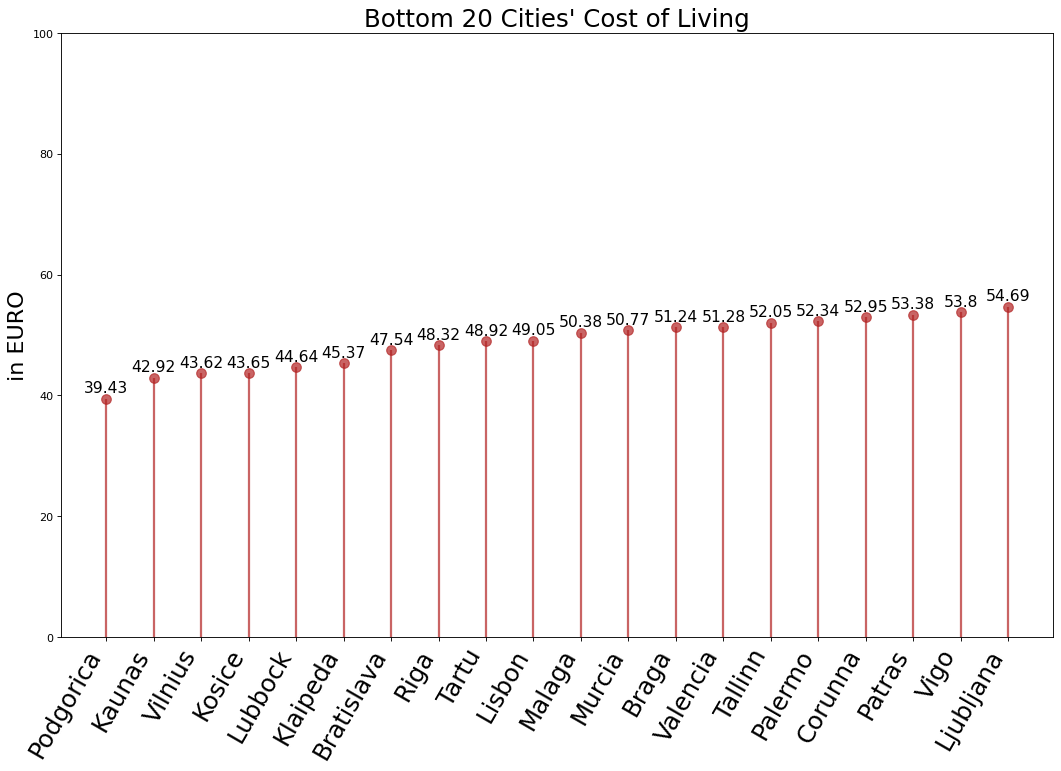

In [15]:
df3 = df[df['Cost_index'] !=0]
df3 = df3[['Cost_index', 'City','country','population']]
df3.sort_values('Cost_index', inplace=True)
df3.reset_index(inplace=True)
df4 = df3.head(20)
df4 = df4[['Cost_index', 'City']]
df4.sort_values('Cost_index', inplace=True)
df4.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df4.index, ymin=0, ymax=df4.Cost_index, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df4.index, y=df4.Cost_index, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Bottom 20 Cities\' Cost of Living', fontdict={'size':22})
ax.set_ylabel('in EURO',fontdict={'size':20})
ax.set_xticks(df4.index)
ax.set_xticklabels(df4.City, rotation=60, fontdict={'horizontalalignment': 'right', 'size':22})
ax.set_ylim(0, 100)

# Annotate
for row in df4.itertuples():
    ax.text(row.Index, row.Cost_index+.5, s=round(row.Cost_index, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

fig = ax.get_figure()
fig.savefig("Bottom20CitiesCostofLiving.jpg") 

<a id='cell16'></a>
#### 4.3 Cost of Living Jointplot

In [16]:
df.columns.tolist()


['City',
 'Cost_index',
 'Rst_MealInexpensiveRestaurant',
 'Rst_Mealfor2People_Mid-rangeRestaurantThree-course',
 'Rst_McMealatMcDonalds',
 'Rst_DomesticBeerhalfliter',
 'Rst_ImportedBeerOneThirdliterbottle',
 'Rst_Cappuccinoregular',
 'Rst_CokePepsiOneThirdliterbottle',
 'Mkt_Milkregular1liter',
 'Mkt_LoafofFreshWhiteBread500g',
 'Mkt_Ricewhite1kg',
 'Mkt_Eggsregular12',
 'Mkt_LocalCheese1kg',
 'Mkt_ChickenFillets1kg',
 'Mkt_BeefRound1kgBackLegRedMeat',
 'Mkt_Apples1kg',
 'Mkt_Banana1kg',
 'Mkt_Oranges1kg',
 'Mkt_Tomato1kg',
 'Mkt_Potato1kg',
 'Mkt_Onion1kg',
 'Mkt_Lettuce1head',
 'Mkt_WaterOneandHalfliterbottle',
 'Mkt_BottleofWineMid-Range',
 'Mkt_DomesticBeerHalfliterbottle',
 'Mkt_ImportedBeerOneThirdliterbottle',
 'Mkt_Cigarettes20PackMarlboro',
 'Trsp_One-wayTicket',
 'Trsp_MonthlyPassTransportation',
 'Trsp_TaxiStart',
 'Trsp_Taxi1km',
 'Trsp_Taxi1hourWaiting',
 'Trsp_Gasoline1liter',
 'Trsp_VolkswagenGolf1490KWTrendline',
 'Trsp_ToyotaCorollaSedan16l97kWComfort',
 'Uty_BasicEl

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python

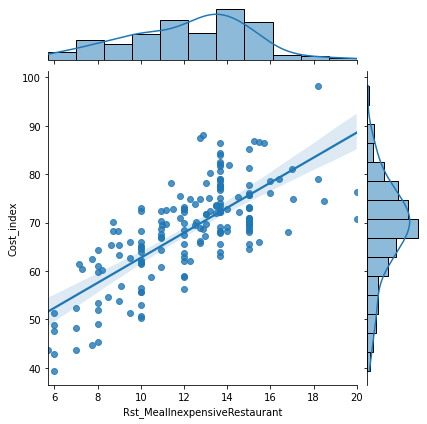

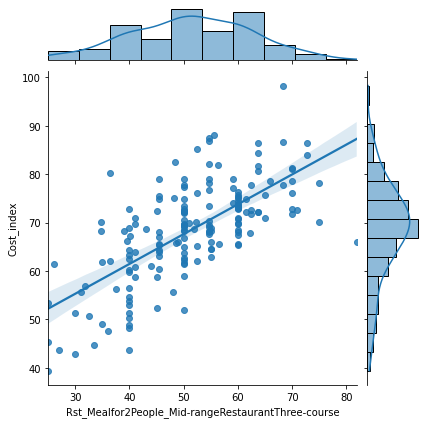

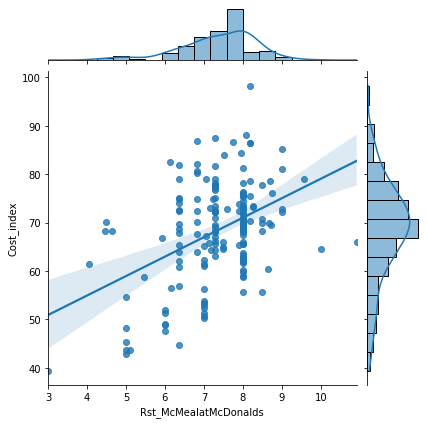

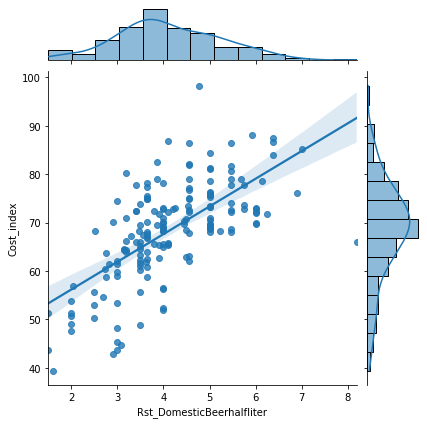

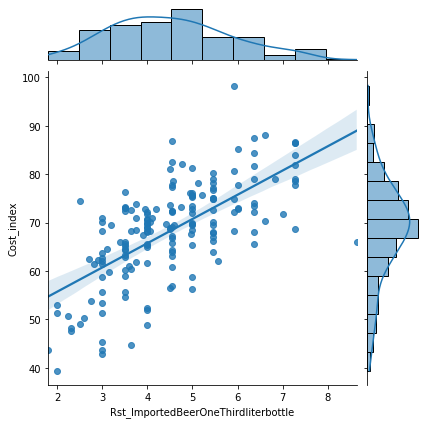

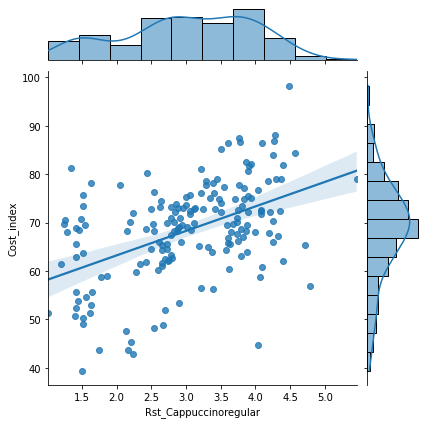

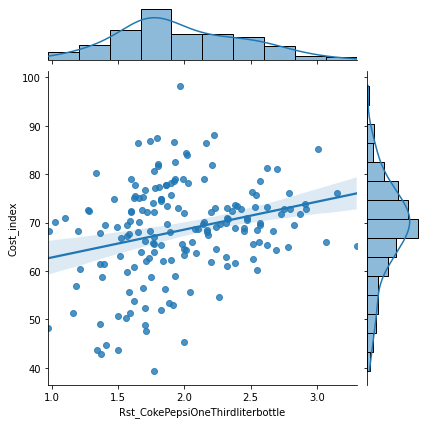

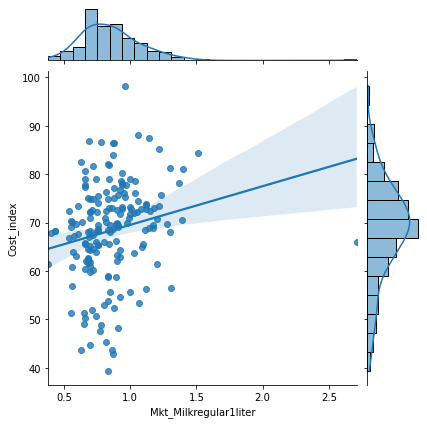

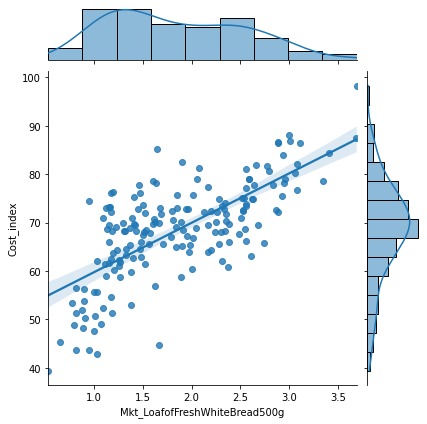

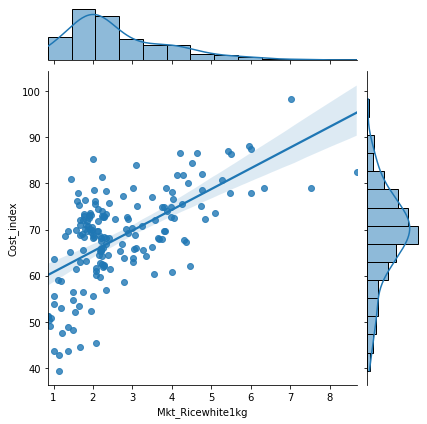

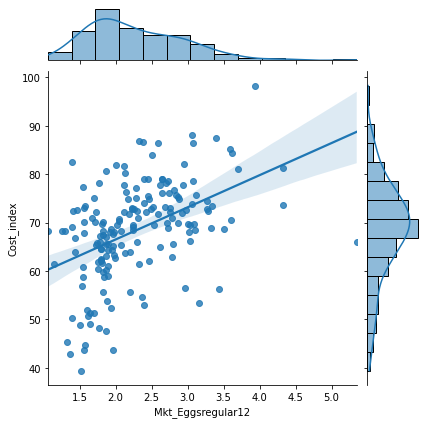

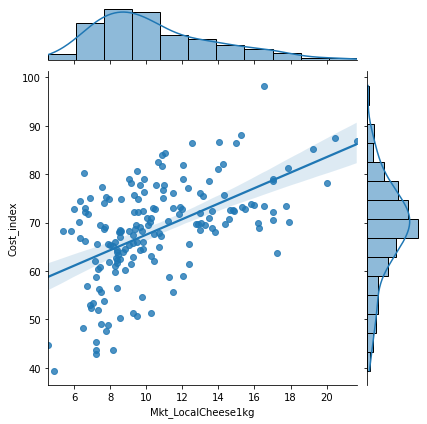

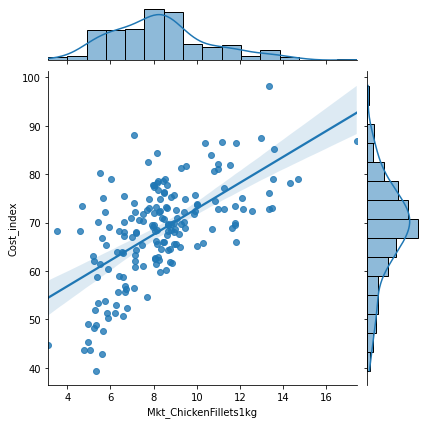

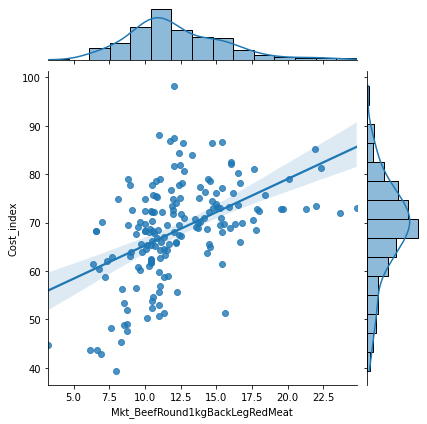

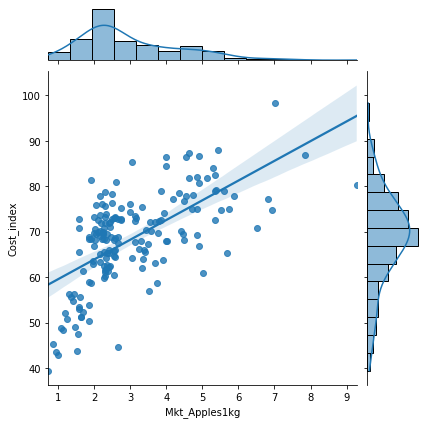

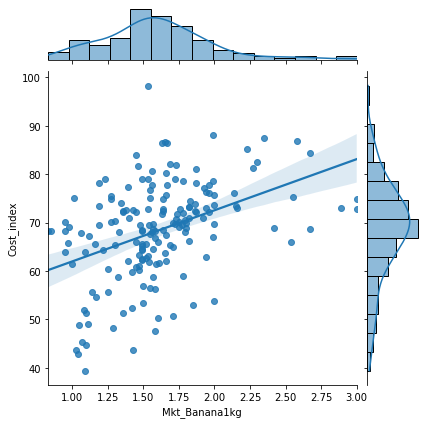

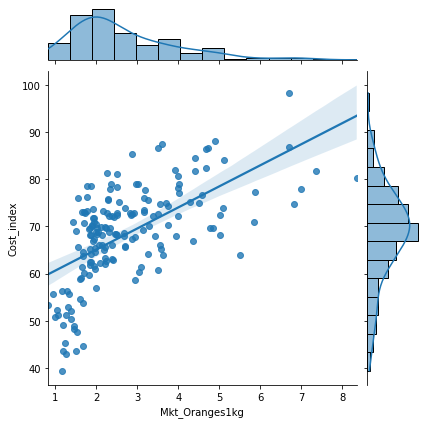

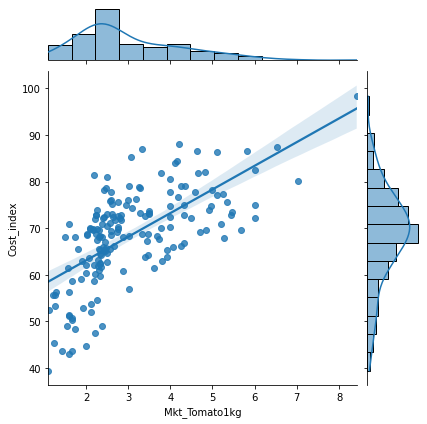

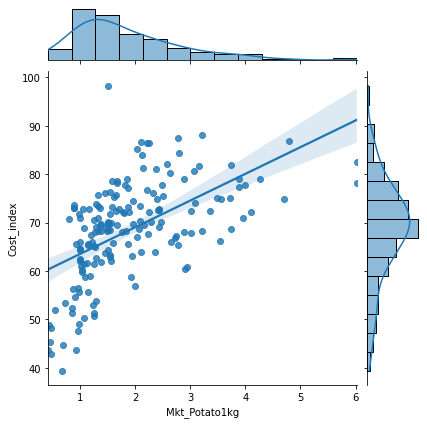

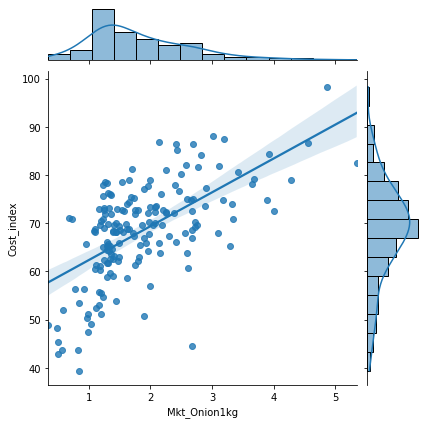

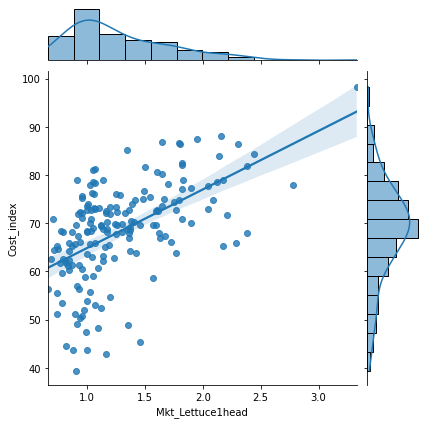

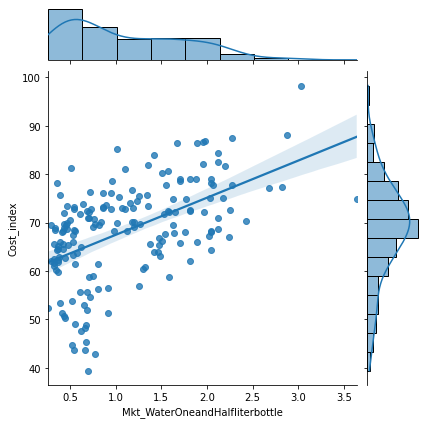

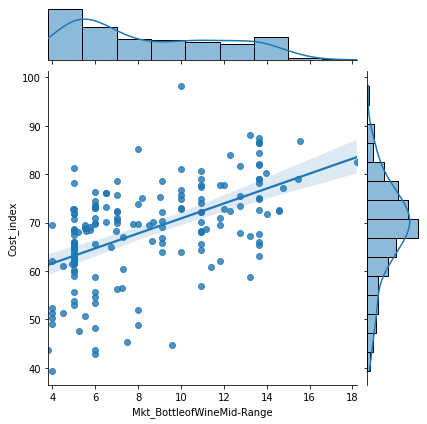

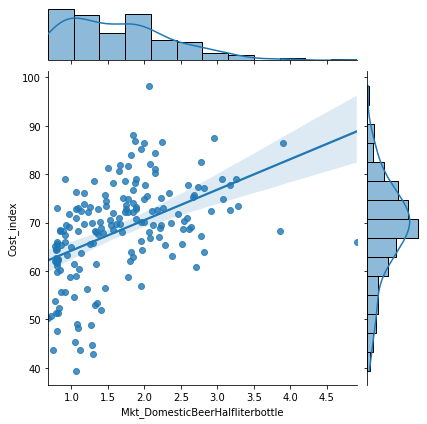

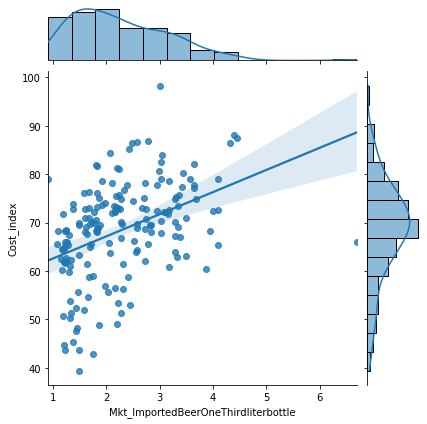

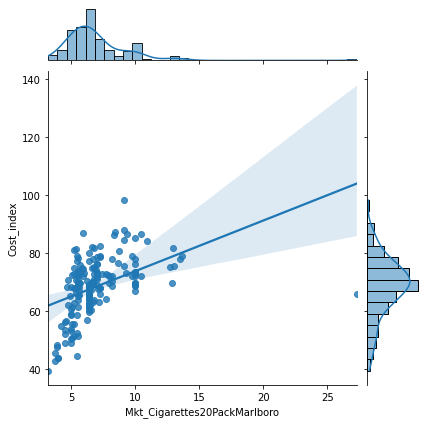

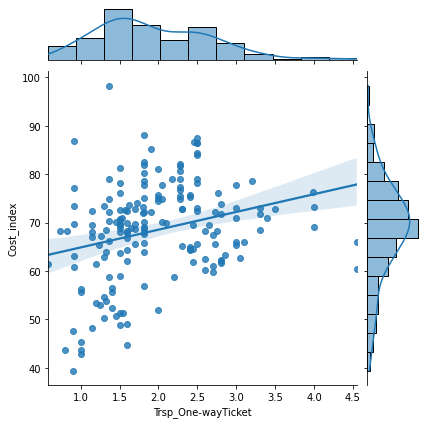

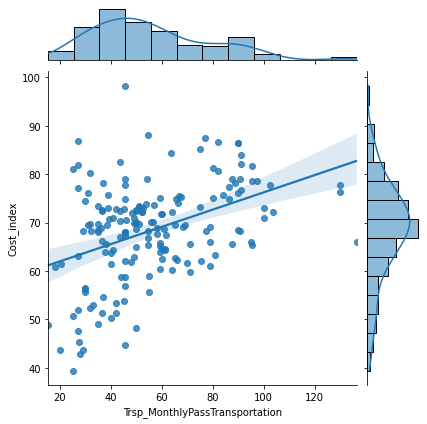

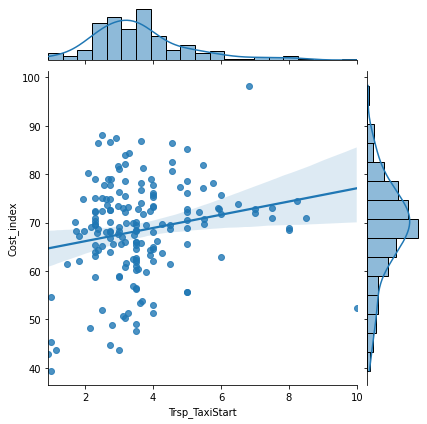

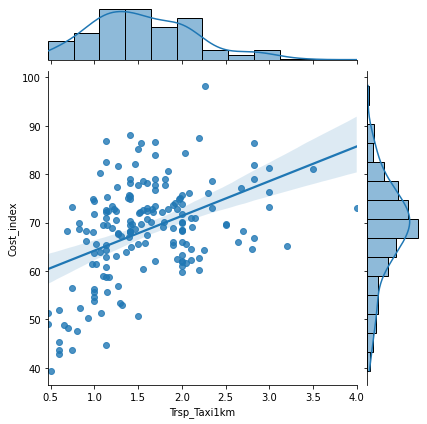

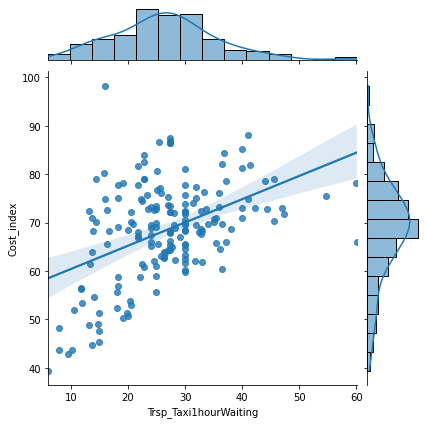

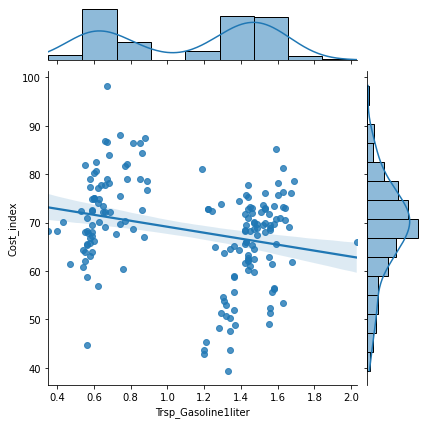

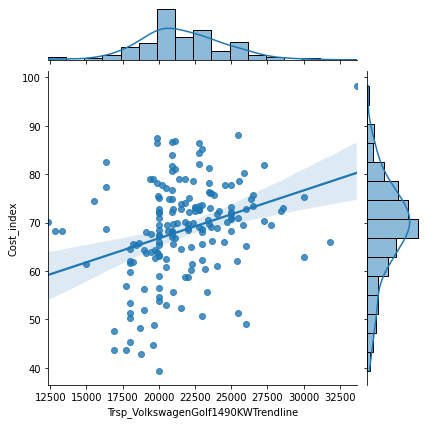

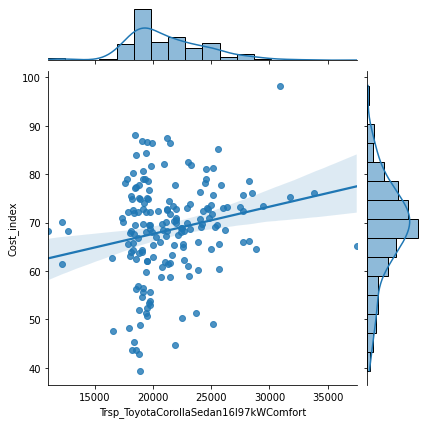

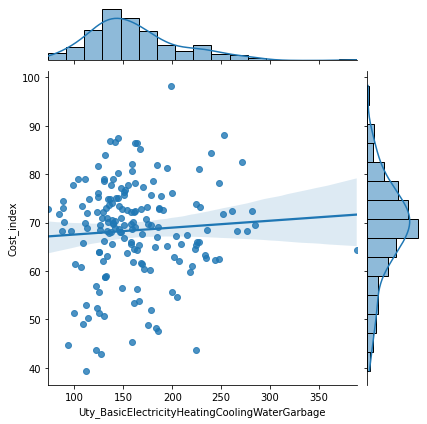

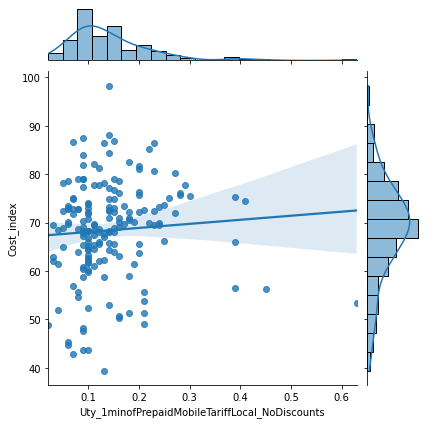

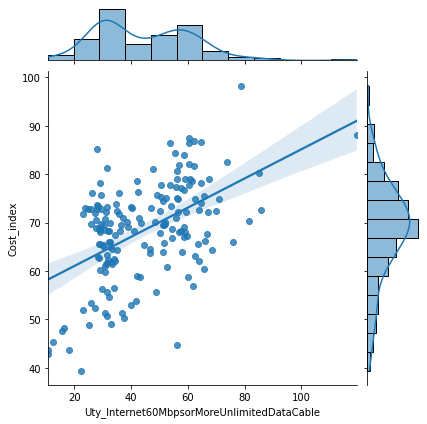

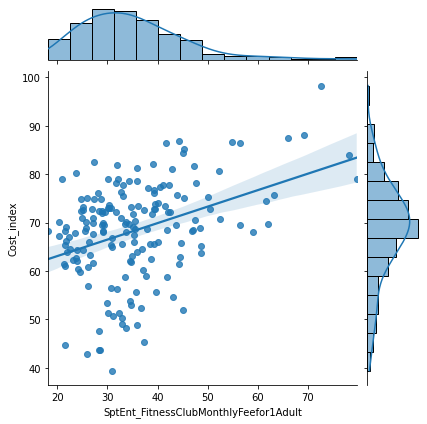

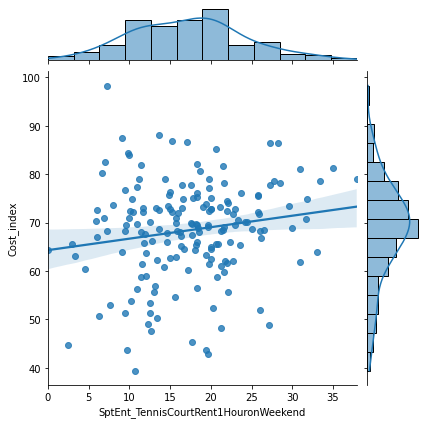

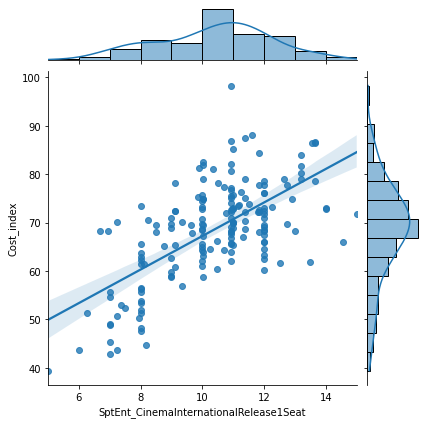

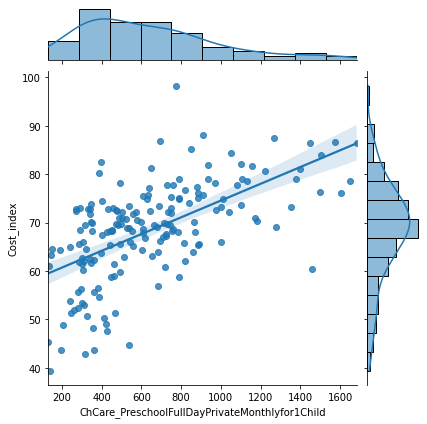

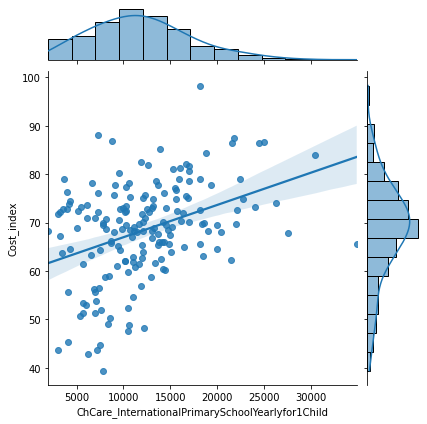

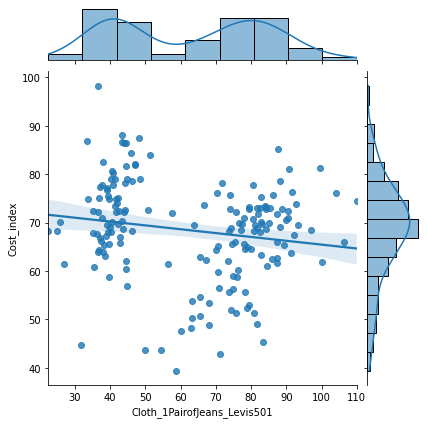

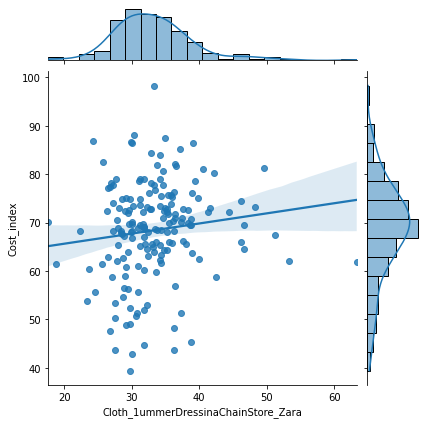

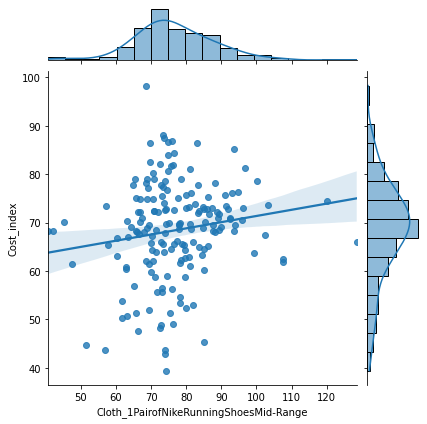

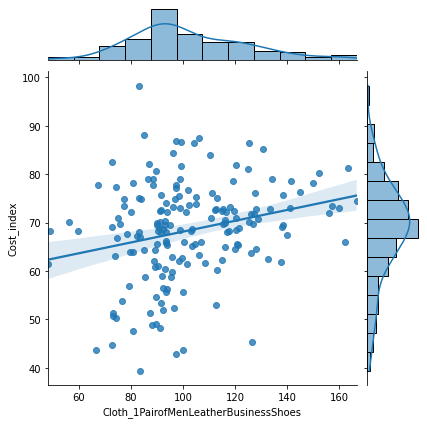

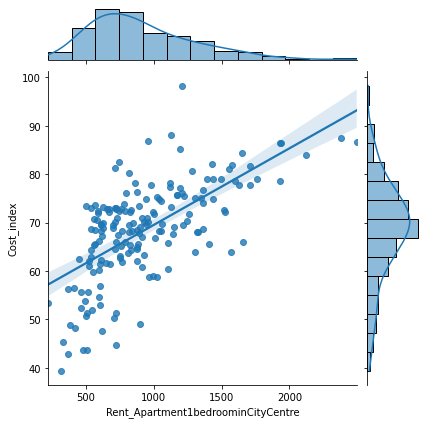

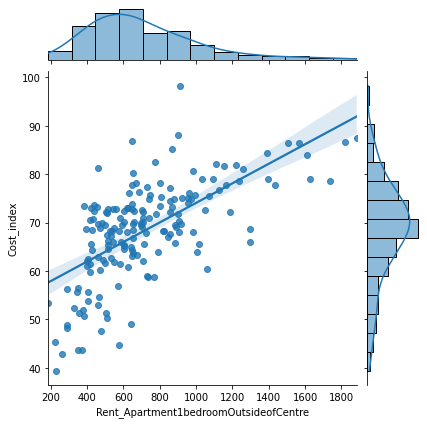

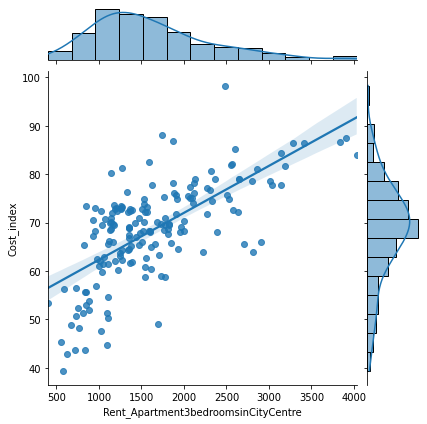

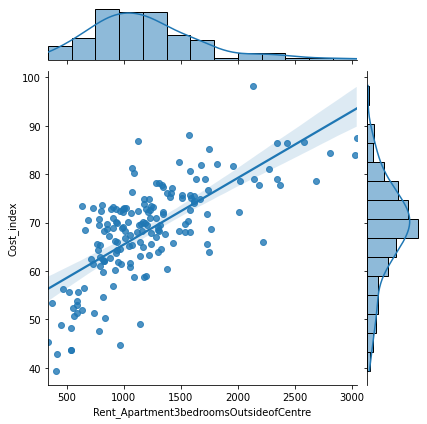

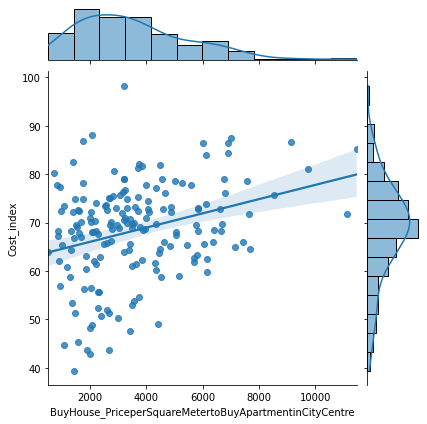

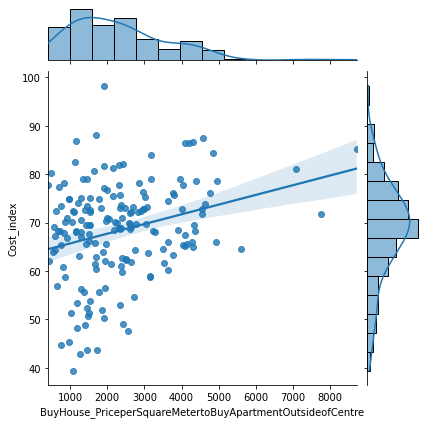

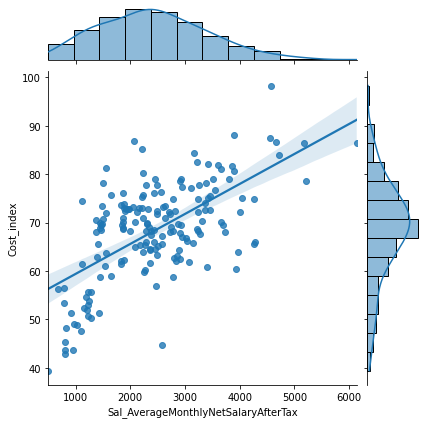

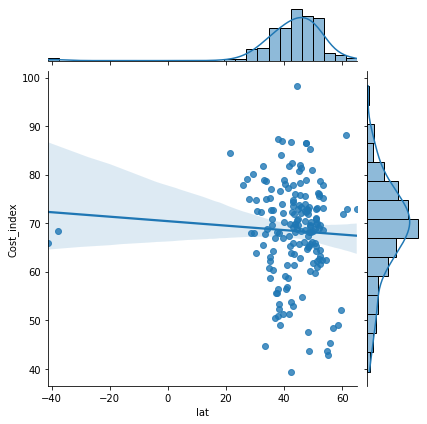

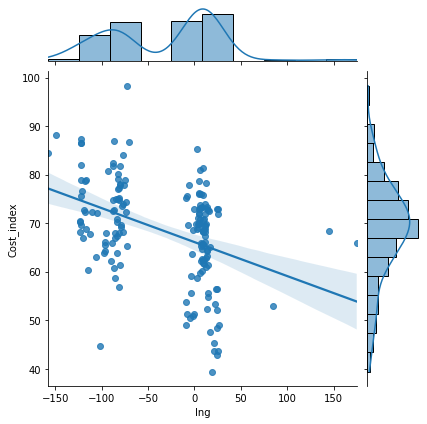

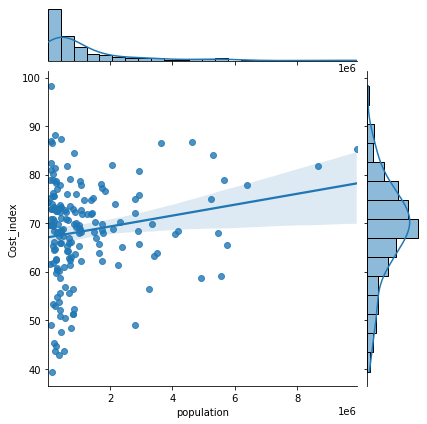

In [17]:
features = ['Rst_MealInexpensiveRestaurant',
 'Rst_Mealfor2People_Mid-rangeRestaurantThree-course',
 'Rst_McMealatMcDonalds',
 'Rst_DomesticBeerhalfliter',
 'Rst_ImportedBeerOneThirdliterbottle',
 'Rst_Cappuccinoregular',
 'Rst_CokePepsiOneThirdliterbottle',
 'Mkt_Milkregular1liter',
 'Mkt_LoafofFreshWhiteBread500g',
 'Mkt_Ricewhite1kg',
 'Mkt_Eggsregular12',
 'Mkt_LocalCheese1kg',
 'Mkt_ChickenFillets1kg',
 'Mkt_BeefRound1kgBackLegRedMeat',
 'Mkt_Apples1kg',
 'Mkt_Banana1kg',
 'Mkt_Oranges1kg',
 'Mkt_Tomato1kg',
 'Mkt_Potato1kg',
 'Mkt_Onion1kg',
 'Mkt_Lettuce1head',
 'Mkt_WaterOneandHalfliterbottle',
 'Mkt_BottleofWineMid-Range',
 'Mkt_DomesticBeerHalfliterbottle',
 'Mkt_ImportedBeerOneThirdliterbottle',
 'Mkt_Cigarettes20PackMarlboro',
 'Trsp_One-wayTicket',
 'Trsp_MonthlyPassTransportation',
 'Trsp_TaxiStart',
 'Trsp_Taxi1km',
 'Trsp_Taxi1hourWaiting',
 'Trsp_Gasoline1liter',
 'Trsp_VolkswagenGolf1490KWTrendline',
 'Trsp_ToyotaCorollaSedan16l97kWComfort',
 'Uty_BasicElectricityHeatingCoolingWaterGarbage',
 'Uty_1minofPrepaidMobileTariffLocal_NoDiscounts',
 'Uty_Internet60MbpsorMoreUnlimitedDataCable',
 'SptEnt_FitnessClubMonthlyFeefor1Adult',
 'SptEnt_TennisCourtRent1HouronWeekend',
 'SptEnt_CinemaInternationalRelease1Seat',
 'ChCare_PreschoolFullDayPrivateMonthlyfor1Child',
 'ChCare_InternationalPrimarySchoolYearlyfor1Child',
 'Cloth_1PairofJeans_Levis501',
 'Cloth_1ummerDressinaChainStore_Zara',
 'Cloth_1PairofNikeRunningShoesMid-Range',
 'Cloth_1PairofMenLeatherBusinessShoes',
 'Rent_Apartment1bedroominCityCentre',
 'Rent_Apartment1bedroomOutsideofCentre',
 'Rent_Apartment3bedroomsinCityCentre',
 'Rent_Apartment3bedroomsOutsideofCentre',
 'BuyHouse_PriceperSquareMetertoBuyApartmentinCityCentre',
 'BuyHouse_PriceperSquareMetertoBuyApartmentOutsideofCentre',
 'Sal_AverageMonthlyNetSalaryAfterTax',
 'lat',
 'lng',
 'population']
y = 'Cost_index'

df = df[df['Cost_index'] !=0]

for x in features:
    joint_grid = sns.jointplot(x, y, data=df, kind='reg');
    joint_grid.savefig(x+"joint_grid.png")
    
    #
##https://www.geeksforgeeks.org/grid-plot-in-python-using-seaborn/?ref=lbp

###### From the Cost Index jointplot, we can see 
1. Cost Index has a strong regression relationship with restaurant data.
2. Cost Index has a strong regression relationship with rent apartment(s) data.
3. Cost Index has a strong regression relationship with most Market data.
4. Cost Index has a strong regression relationship with basic utilities data.
5. Cost Index has a strong regression relationship with Childcare data.
6. Cost Index has a strong regression relationship with Buy House data.
7. Cost Index has a strong regression relationship with Salary data.

##### The diagonals are ‘hist’ type plot, the upper grid is’scatter’ type plot and the lower grid is ‘kde’ type plot.
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

<a id='cell17'></a>
#### 4.4 Restaurant Data PairGrid

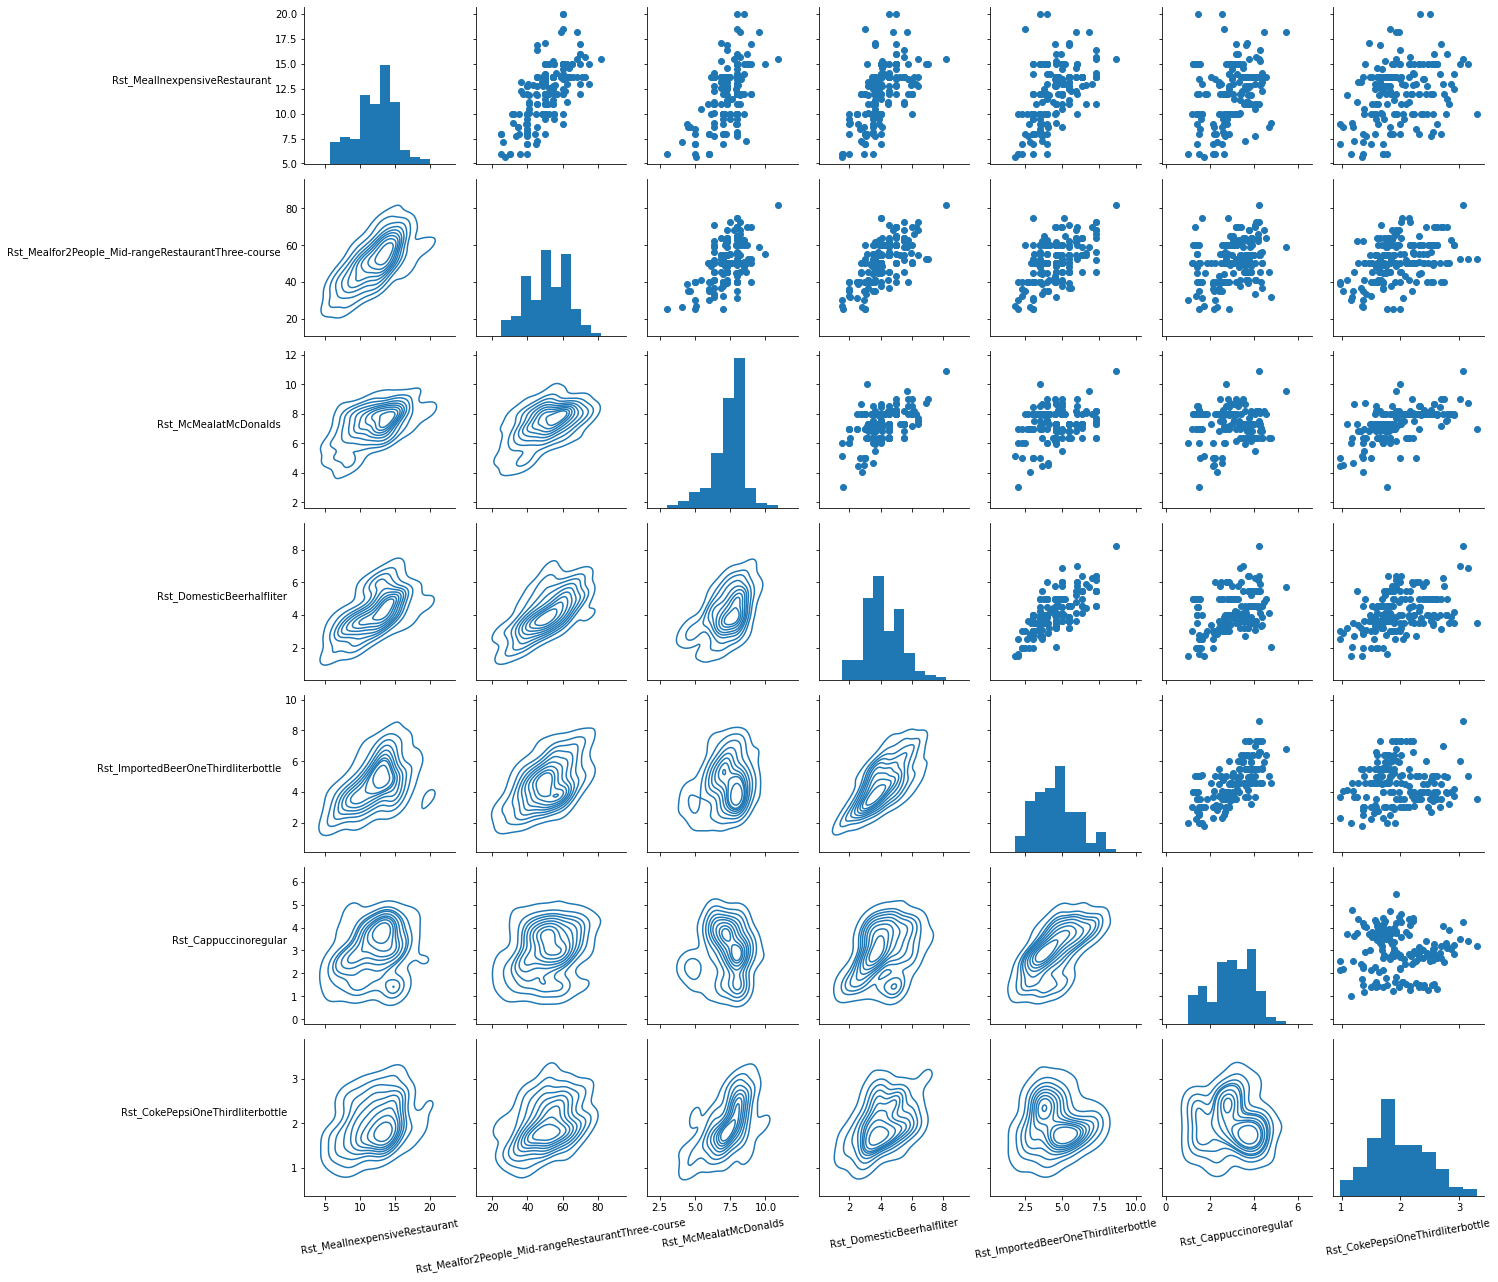

In [18]:
rst_df = df[df['Cost_index'] !=0]
rst_df = rst_df[[
 'Rst_MealInexpensiveRestaurant',
 'Rst_Mealfor2People_Mid-rangeRestaurantThree-course',
 'Rst_McMealatMcDonalds',
 'Rst_DomesticBeerhalfliter',
 'Rst_ImportedBeerOneThirdliterbottle',
 'Rst_Cappuccinoregular',
 'Rst_CokePepsiOneThirdliterbottle']]

g = sns.PairGrid(rst_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("RestaurantPairGrid.jpg") 

###### From the Restaurant chart above, we can see 
1. 'Rst_MealInexpensiveRestaurant' highly correlated to 'Rst_Mealfor2People_Mid-rangeRestaurantThree-course', 'Rst_DomesticBeerhalfliter', and 'Rst_ImportedBeerOneThirdliterbottle'.
2. 'Rst_Cappuccinoregular' is highly correlated to 'Rst_ImportedBeerOneThirdliterbottle'.

<a id='cell18'></a>
#### 4.5 Market Data PairGrid

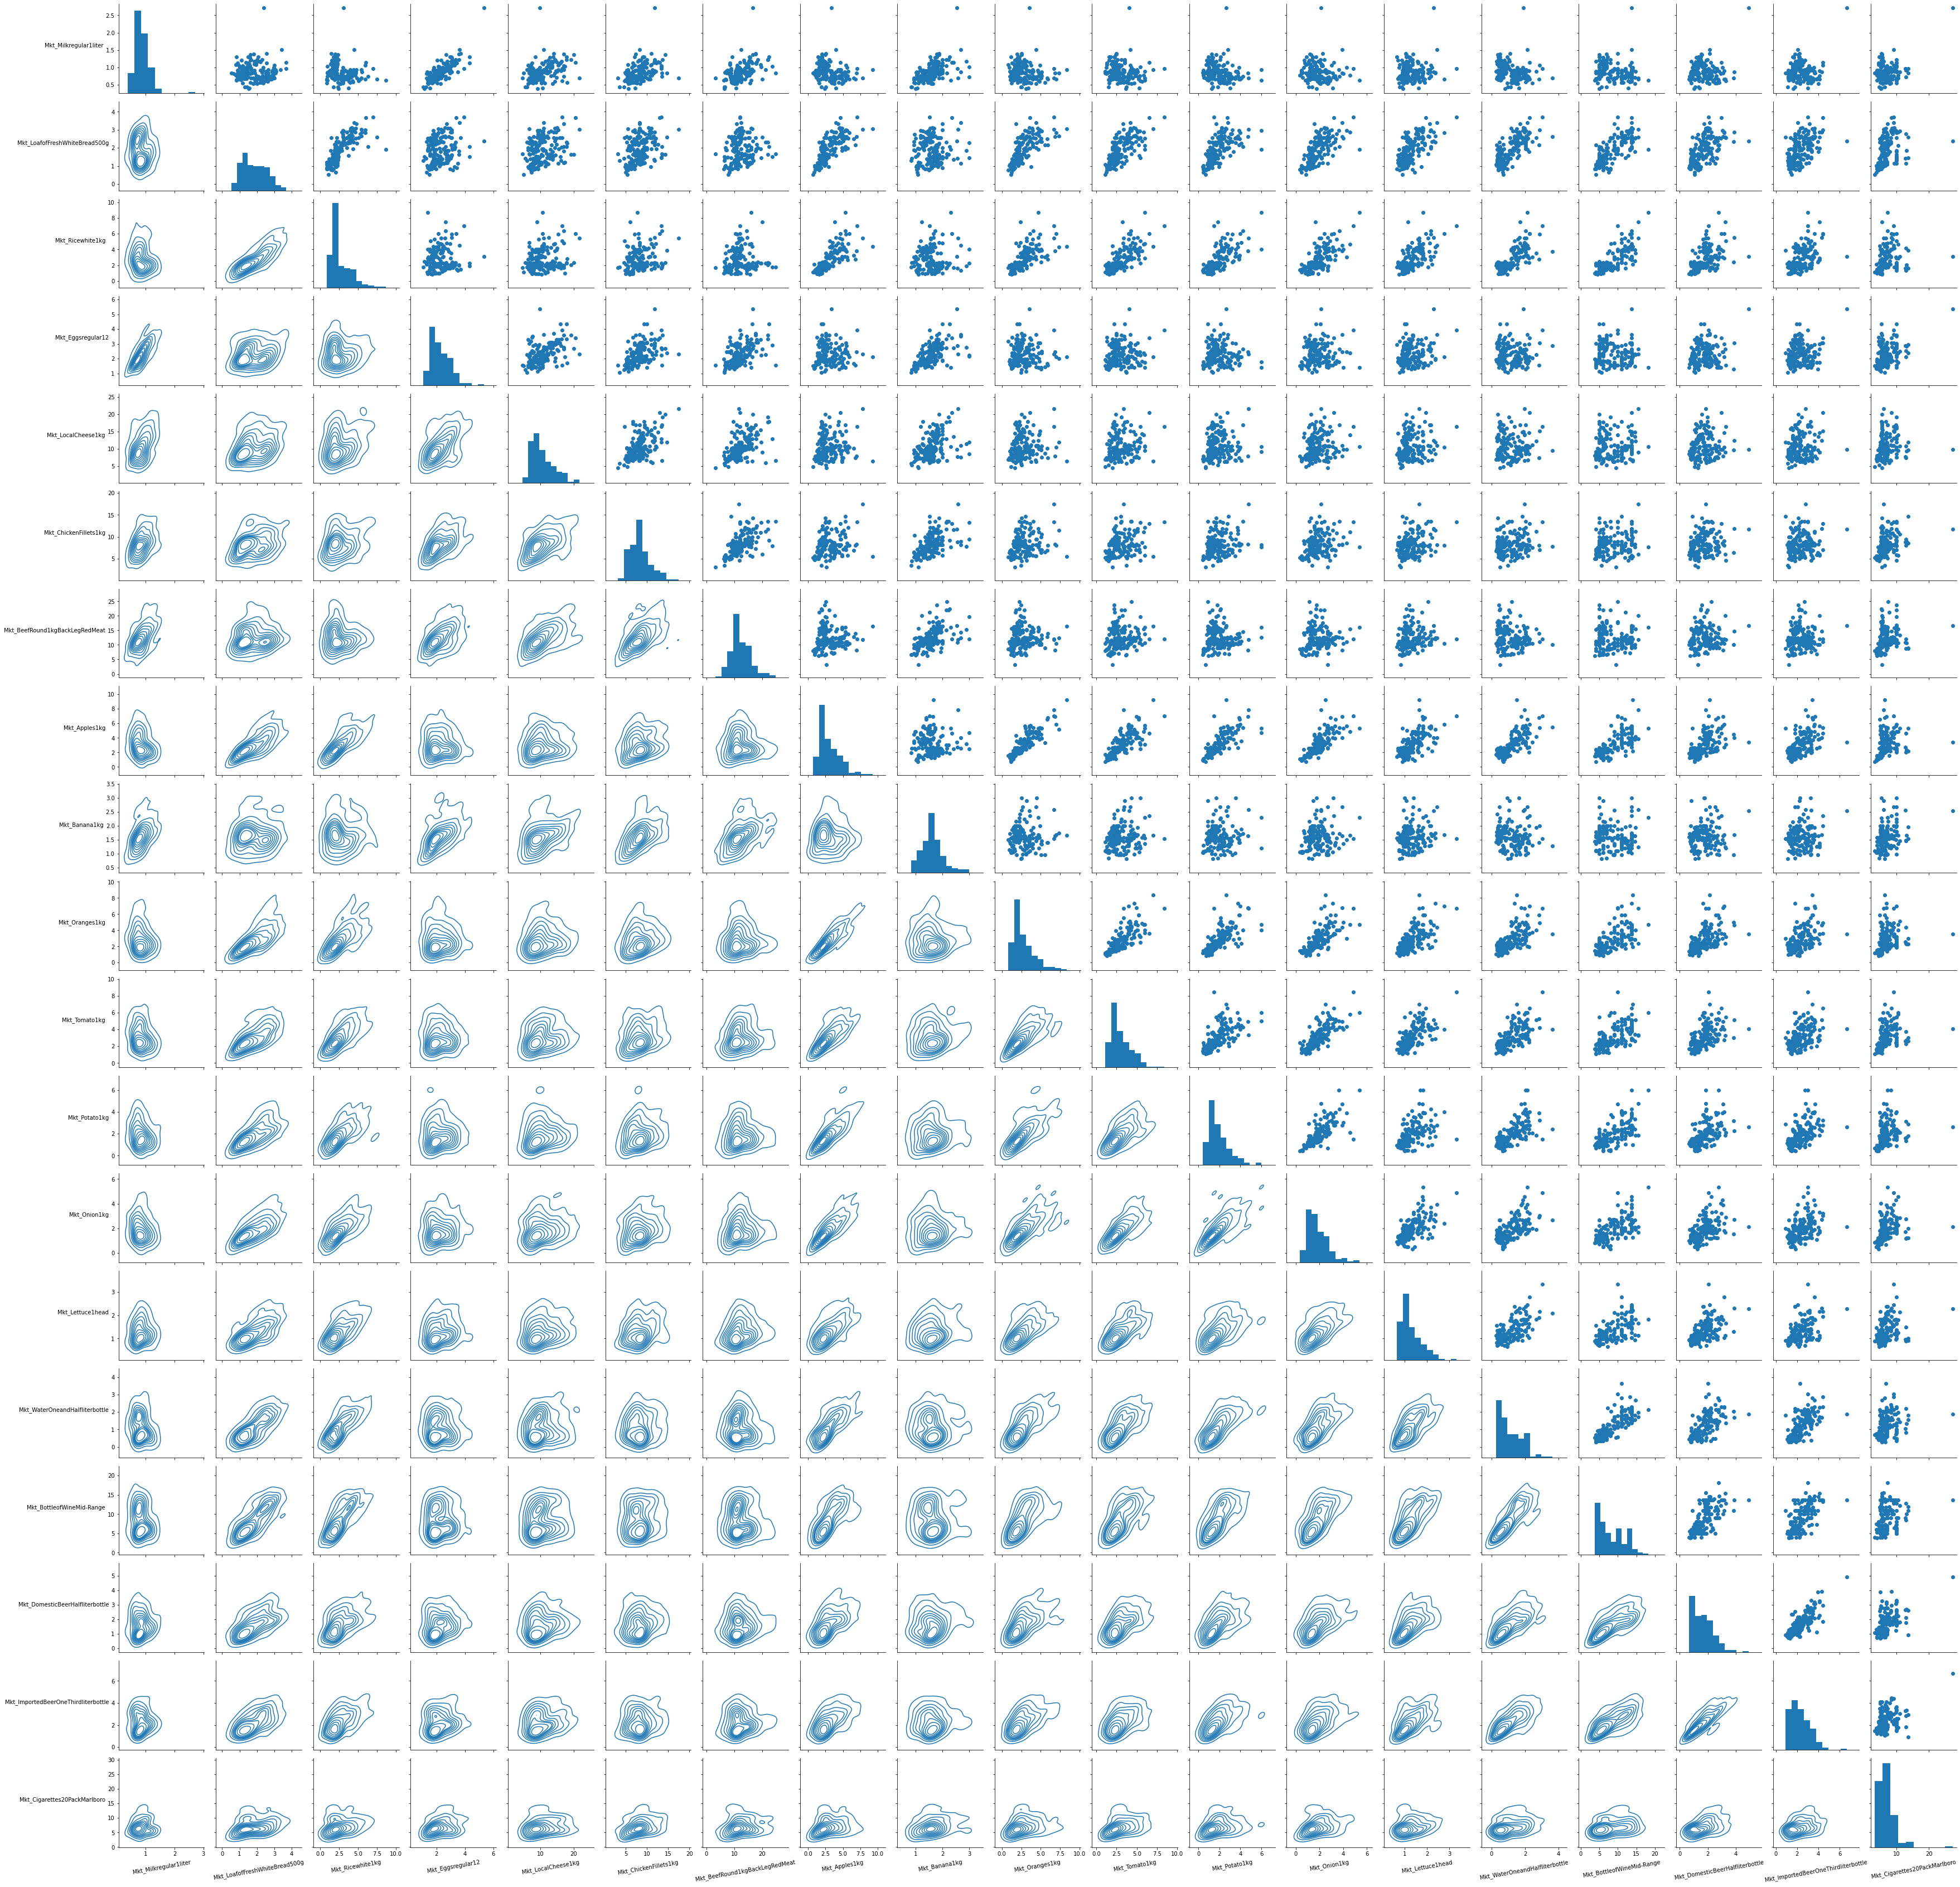

In [19]:
market_df = df[df['Cost_index'] !=0]
market_df = market_df[[
 'Mkt_Milkregular1liter',
 'Mkt_LoafofFreshWhiteBread500g',
 'Mkt_Ricewhite1kg',
 'Mkt_Eggsregular12',
 'Mkt_LocalCheese1kg',
 'Mkt_ChickenFillets1kg',
 'Mkt_BeefRound1kgBackLegRedMeat',
 'Mkt_Apples1kg',
 'Mkt_Banana1kg',
 'Mkt_Oranges1kg',
 'Mkt_Tomato1kg',
 'Mkt_Potato1kg',
 'Mkt_Onion1kg',
 'Mkt_Lettuce1head',
 'Mkt_WaterOneandHalfliterbottle',
 'Mkt_BottleofWineMid-Range',
 'Mkt_DomesticBeerHalfliterbottle',
 'Mkt_ImportedBeerOneThirdliterbottle',
 'Mkt_Cigarettes20PackMarlboro']]

g = sns.PairGrid(market_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("MarketPairGrid.jpg") 

###### From the Market Data, we can see
1. 'Mkt_Banana1kg' is highly correlated with 'Mkt_Apples1kg'.
2. 'Mkt_BeefRound1kgBackLegRedMeat' is highly correlated with 'Mkt_Banana1kg'.
3. 'Mkt_BottleofWineMid-Range' is highly correlated with 'Mkt_BeefRound1kgBackLegRedMeat'.
4. 'Mkt_ChickenFillets1kg' is highly correlated with 'Mkt_BottleofWineMid-Range'. 
5. 'Mkt_Cigarettes20PackMarlboro' is highly correlated with 'Mkt_ChickenFillets1kg'.
6. 'Mkt_DomesticBeerHalfliterbottle' is highly correlated with 'Mkt_Cigarettes20PackMarlboro'.
7. 'Mkt_Eggsregular12' is highly correlated with 'Mkt_DomesticBeerHalfliterbottle'.
8. 'Mkt_ImportedBeerOneThirdliterbottle' is highly correlated with 'Mkt_Eggsregular12'. 
9. 'Mkt_Lettuce1head' is highly correlated with 'Mkt_ImportedBeerOneThirdliterbottle'.
10. 'Mkt_LoafofFreshWhiteBread500g' is highly correlated with 'Mkt_Lettuce1head'.
11. 'Mkt_LocalCheese1kg' is highly correlated with 'Mkt_LoafofFreshWhiteBread500g'. 
12. 'Mkt_Milkregular1liter' is highly correlated with 'Mkt_LocalCheese1kg'. 
13. 'Mkt_Onion1kg' is highly correlated with 'Mkt_Milkregular1liter'.
14. 'Mkt_Oranges1kg' is highly correlated with 'Mkt_Onion1kg'.
15. 'Mkt_Potato1kg' is highly correlated with 'Mkt_Oranges1kg'.
16. 'Mkt_Ricewhite1kg' is highly correlated with 'Mkt_Potato1kg'. 
17. 'Mkt_Tomato1kg' is highly correlated with 'Mkt_Ricewhite1kg'.

<a id='cell19'></a>
#### 4.6 Transportation Data PairGrid

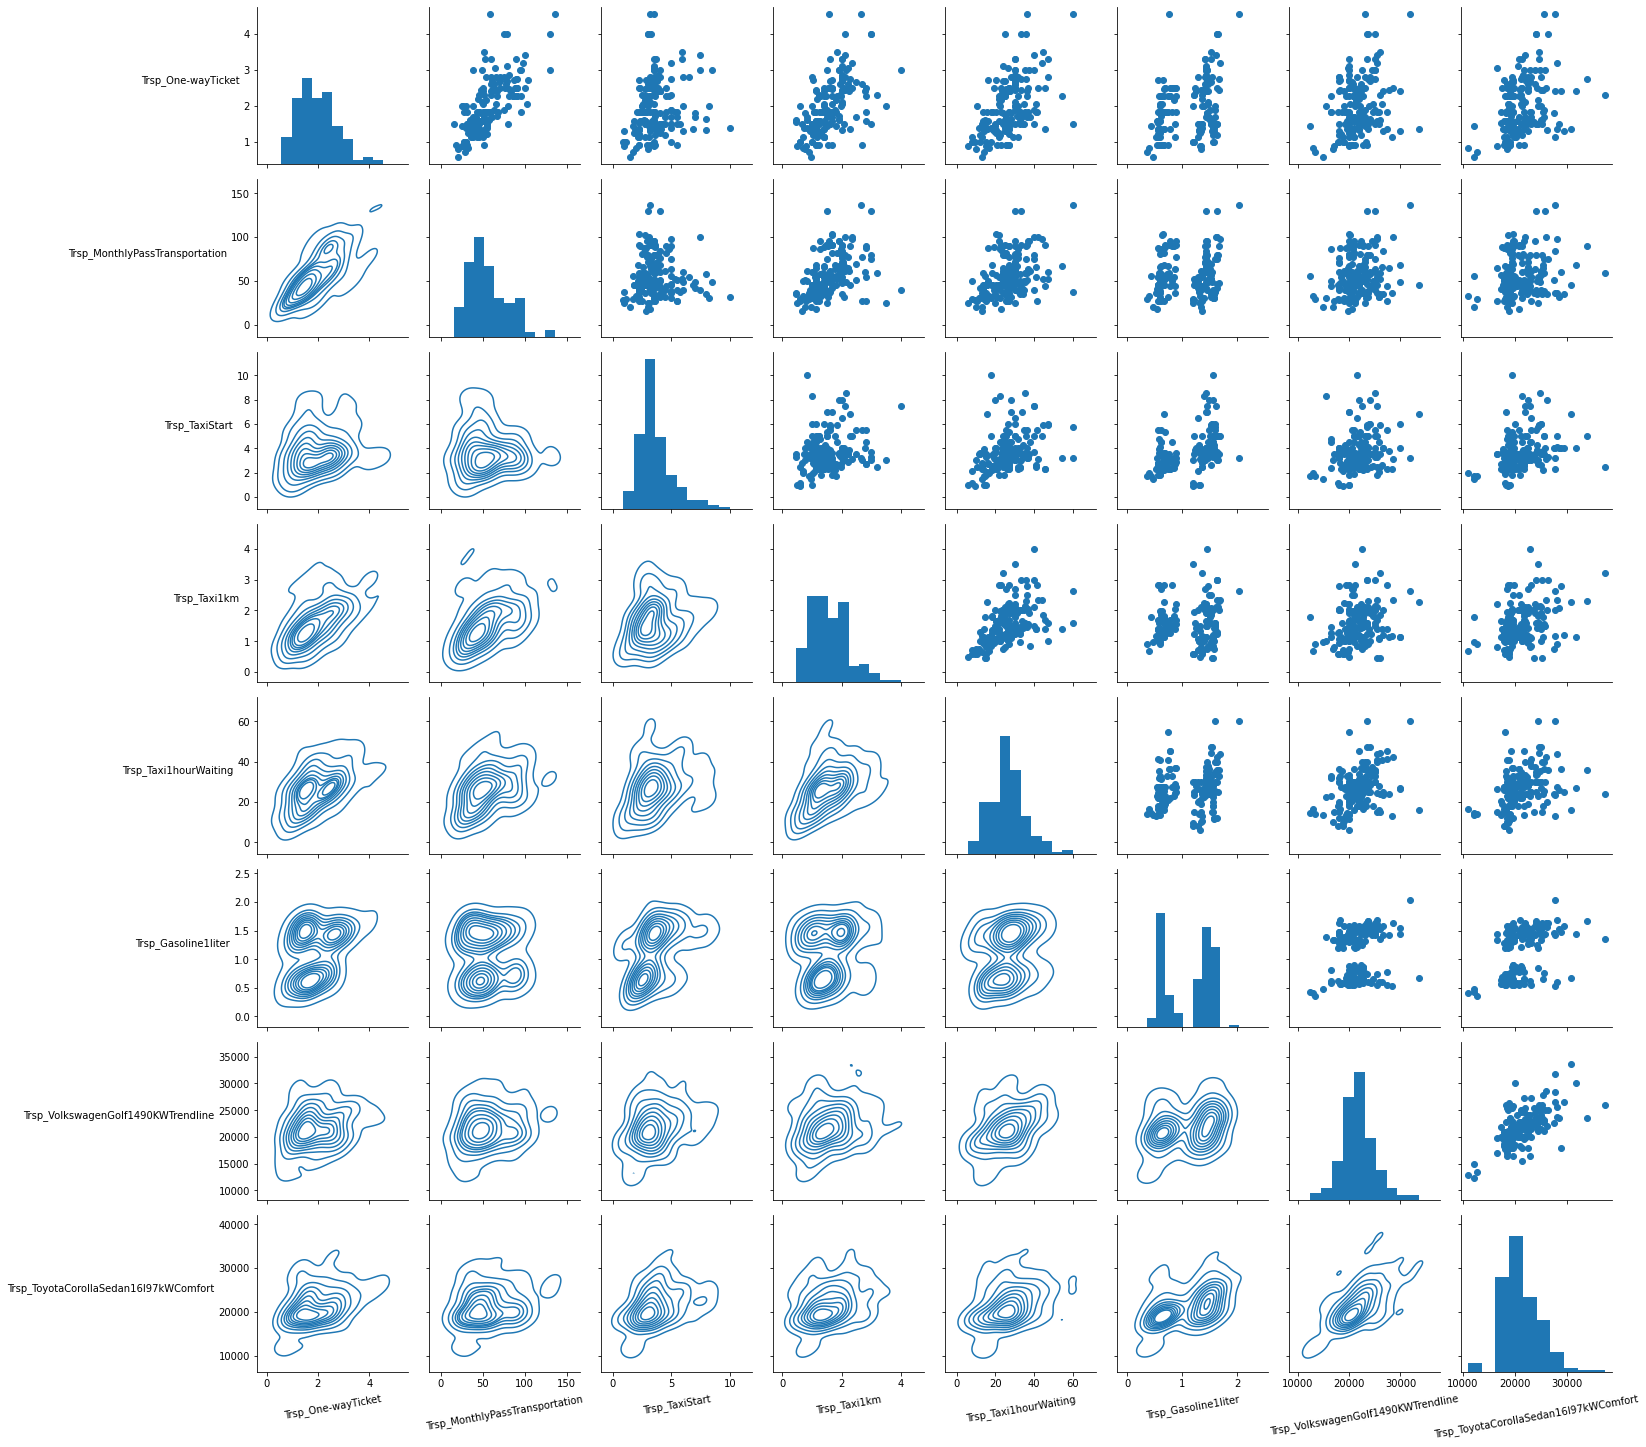

In [20]:
trsp_df = df[df['Cost_index'] !=0]
trsp_df = trsp_df[[
 'Trsp_One-wayTicket',
 'Trsp_MonthlyPassTransportation',
 'Trsp_TaxiStart',
 'Trsp_Taxi1km',
 'Trsp_Taxi1hourWaiting',
 'Trsp_Gasoline1liter',
 'Trsp_VolkswagenGolf1490KWTrendline',
 'Trsp_ToyotaCorollaSedan16l97kWComfort']]

g = sns.PairGrid(trsp_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("TransportationPairGrid.jpg") 

###### From the Transportation chart above, we can see
1. 'Trsp_One-wayTicket' is highly coorelated to 'Trsp_MonthlyPassTransportation','Trsp_TaxiStart',and 'Trsp_Taxi1km'.
2. 'Trsp_Gasoline1liter' has two obvious two categories and medium price is hard to find.

<a id='cell20'></a>
#### 4.7 Utilities Data PairGrid

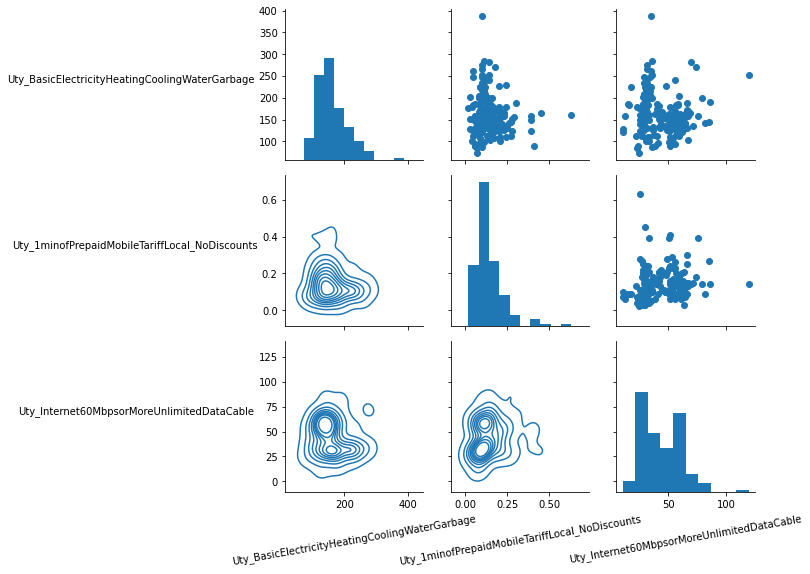

In [21]:
Uty_df = df[df['Cost_index'] !=0]
Uty_df = Uty_df[['Uty_BasicElectricityHeatingCoolingWaterGarbage',
 'Uty_1minofPrepaidMobileTariffLocal_NoDiscounts',
 'Uty_Internet60MbpsorMoreUnlimitedDataCable']]

g = sns.PairGrid(Uty_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("UtilitiesPairGrid.jpg") 

###### From the Utilities chart above, we can see
1. 'Uty_BasicElectricityHeatingCoolingWaterGarbage' is highly correlated with 'Uty_1minofPrepaidMobileTariffLocal_NoDiscounts'.
2. 'Uty_Internet60MbpsorMoreUnlimitedDataCable' is highly correlated with 'Uty_BasicElectricityHeatingCoolingWaterGarbage'.

<a id='cell21'></a>
#### 4.8 Sports And Leisure Data PairGrid

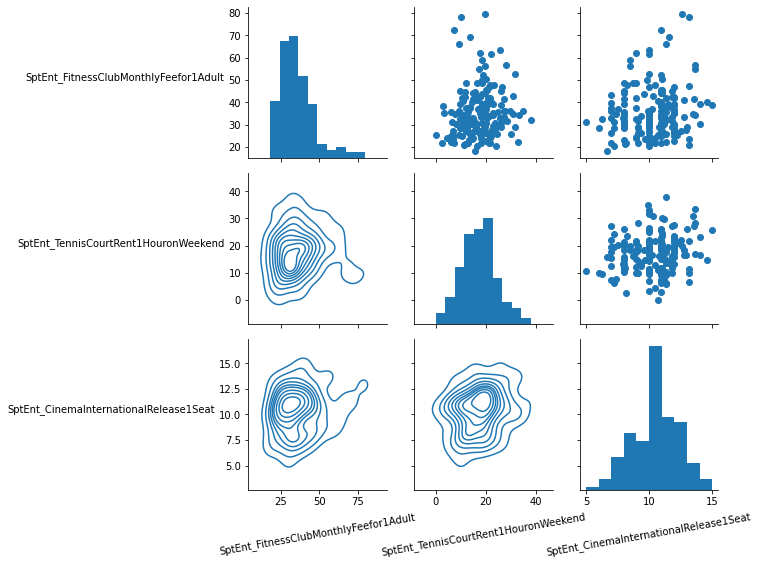

In [22]:
SptEnt_df = df[df['Cost_index'] !=0]
SptEnt_df = SptEnt_df[['SptEnt_FitnessClubMonthlyFeefor1Adult',
 'SptEnt_TennisCourtRent1HouronWeekend',
 'SptEnt_CinemaInternationalRelease1Seat']]

g = sns.PairGrid(SptEnt_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("Sports_LeissurePairGrid.jpg") 

###### From the Sports And Leisure chart above, we can see
1. 'SptEnt_FitnessClubMonthlyFeefor1Adult' is highly correlated with 'SptEnt_CinemaInternationalRelease1Seat'.
2. 'SptEnt_TennisCourtRent1HouronWeekend' is highly correlated with 'SptEnt_FitnessClubMonthlyFeefor1Adult'.

<a id='cell22'></a>
#### 4.9 Childcare Data PairGrid

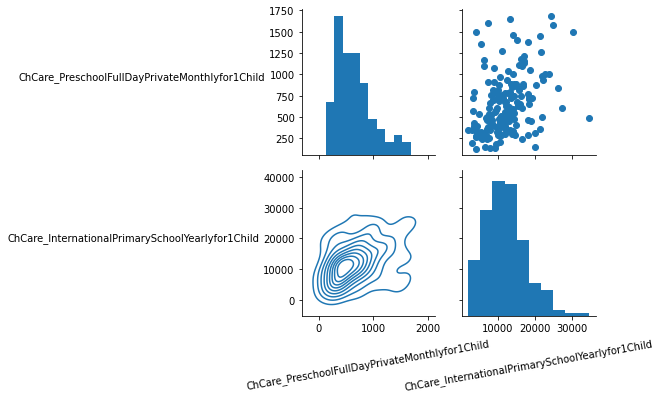

In [23]:
ChCare_df = df[df['Cost_index'] !=0]
ChCare_df = ChCare_df[['ChCare_PreschoolFullDayPrivateMonthlyfor1Child',
 'ChCare_InternationalPrimarySchoolYearlyfor1Child']]

g = sns.PairGrid(ChCare_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("ChildrenCarePairGrid.jpg")


###### From the Childcare chart above, we can see the  linear  regression relationship between two features.

<a id='cell23'></a>
#### 4.10 Clothing and Shoes Data PairGrid

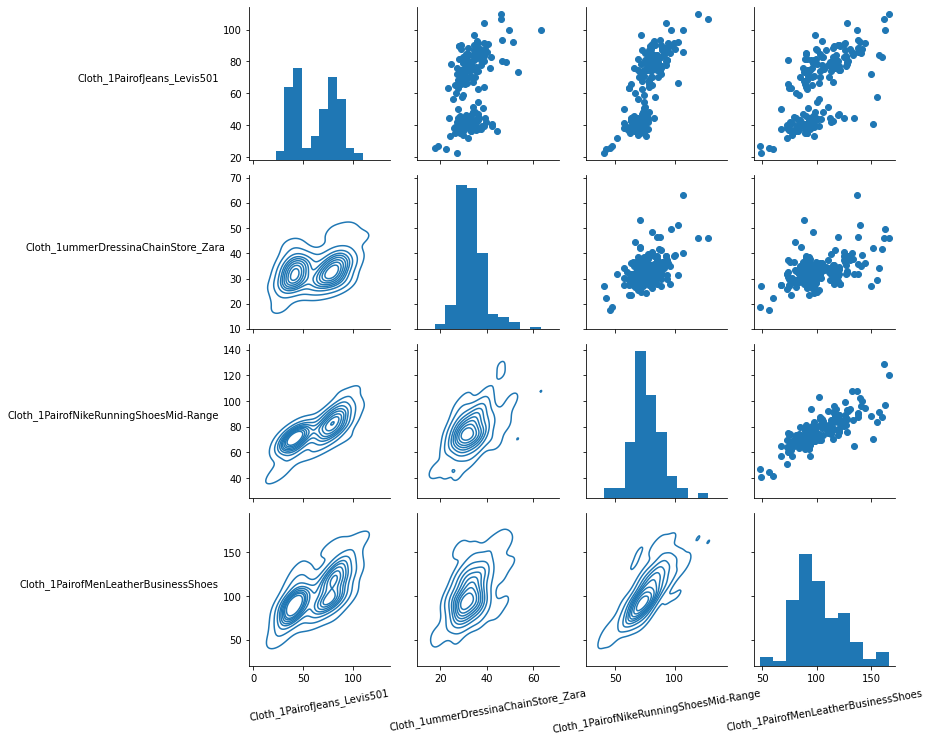

In [22]:
Clothing_df = df[df['Cost_index'] !=0]
Clothing_df = Clothing_df[['Cloth_1PairofJeans_Levis501',
                           'Cloth_1ummerDressinaChainStore_Zara',
                           'Cloth_1PairofNikeRunningShoesMid-Range',
                           'Cloth_1PairofMenLeatherBusinessShoes']]

g = sns.PairGrid(Clothing_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("ClothingPairGrid.jpg")

###### From the clothing and Shoes chart above, we can see
1. 'Cloth_1PairofMenLeatherBusinessShoes' is highly correlated with 'Cloth_1PairofJeans_Levis501'.
2. 'Cloth_1PairofNikeRunningShoesMid-Range' is highly correlated with 'Cloth_1PairofMenLeatherBusinessShoes'.
3. 'Cloth_1ummerDressinaChainStore_Zara' is highly correlated with 'Cloth_1PairofNikeRunningShoesMid-Range'.

<a id='cell24'></a>
#### 4.11 Rent Apartment(s) Data PairGrid

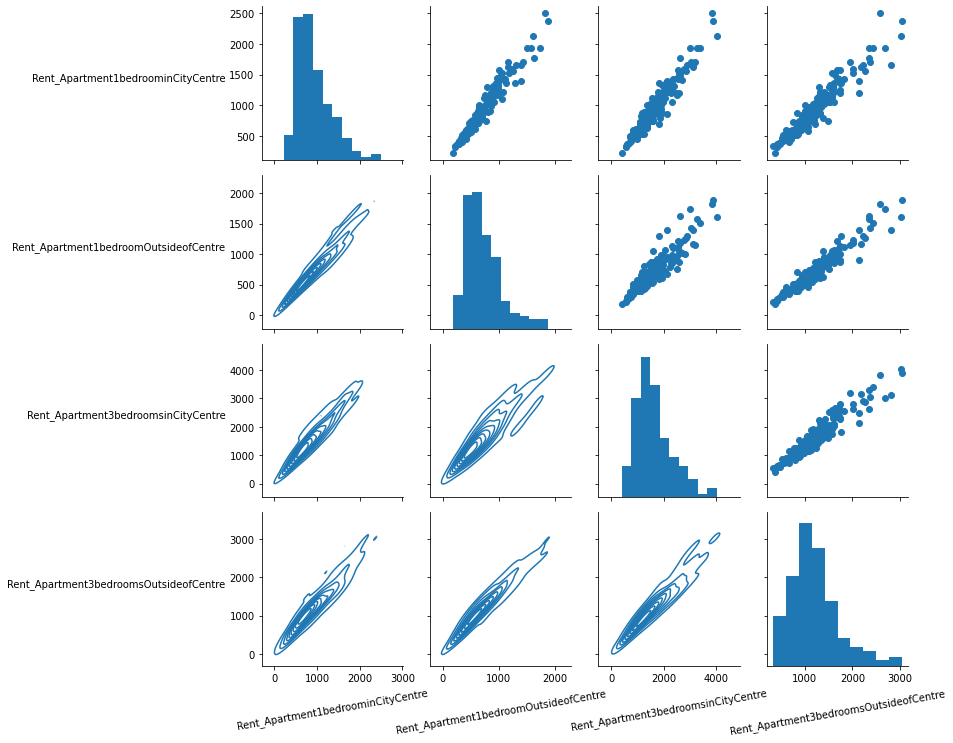

In [25]:
rent_df = df[df['Cost_index'] !=0]
rent_df = rent_df[[
 'Rent_Apartment1bedroominCityCentre',
 'Rent_Apartment1bedroomOutsideofCentre',
 'Rent_Apartment3bedroomsinCityCentre',
 'Rent_Apartment3bedroomsOutsideofCentre']]

g = sns.PairGrid(rent_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("rentPairGrid.jpg")

###### From the Rent Apartment(s) chart above, we can see
1. 'Rent_Apartment1bedroomOutsideofCentre' is highly correlated with 'Rent_Apartment1bedroominCityCentre'.
2. 'Rent_Apartment3bedroomsinCityCentre' is highly correlated with 'Rent_Apartment1bedroomOutsideofCentre'. 
3. 'Rent_Apartment3bedroomsOutsideofCentre' is highly correlated with 'Rent_Apartment3bedroomsinCityCentre'.

<a id='cell25'></a>
#### 4.12 Buy House Data PairGrid

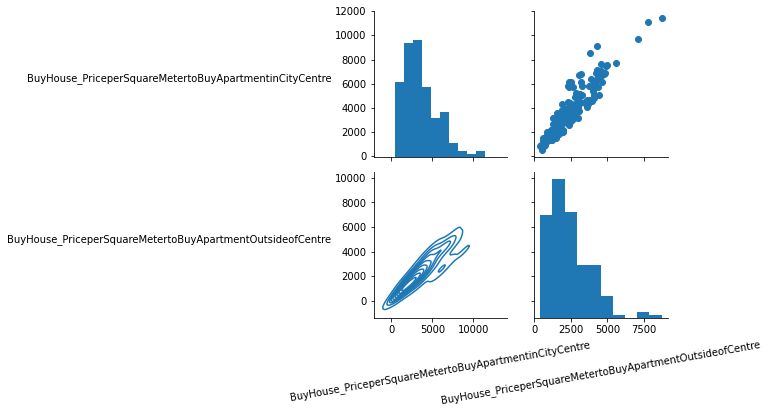

In [26]:
BuyHouse_df = df[df['Cost_index'] !=0]
BuyHouse_df = BuyHouse_df[[
 'BuyHouse_PriceperSquareMetertoBuyApartmentinCityCentre',
 'BuyHouse_PriceperSquareMetertoBuyApartmentOutsideofCentre']]

g = sns.PairGrid(BuyHouse_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("BuyHousePairGrid.jpg")

###### From the Buy House chart above, we can see
1. BuyHouse_PriceperSquareMetertoBuyApartmentOutsideofCentre is highly correlated with BuyHouse_PriceperSquareMetertoBuyApartmentinCityCentre.

<a id='cell26'></a>
#### 4.13 Salary Data PairGrid
Since Salary category only contains one feature, we'd like to see the relationship to the other categories. So, we randomly select one feature from each other category.

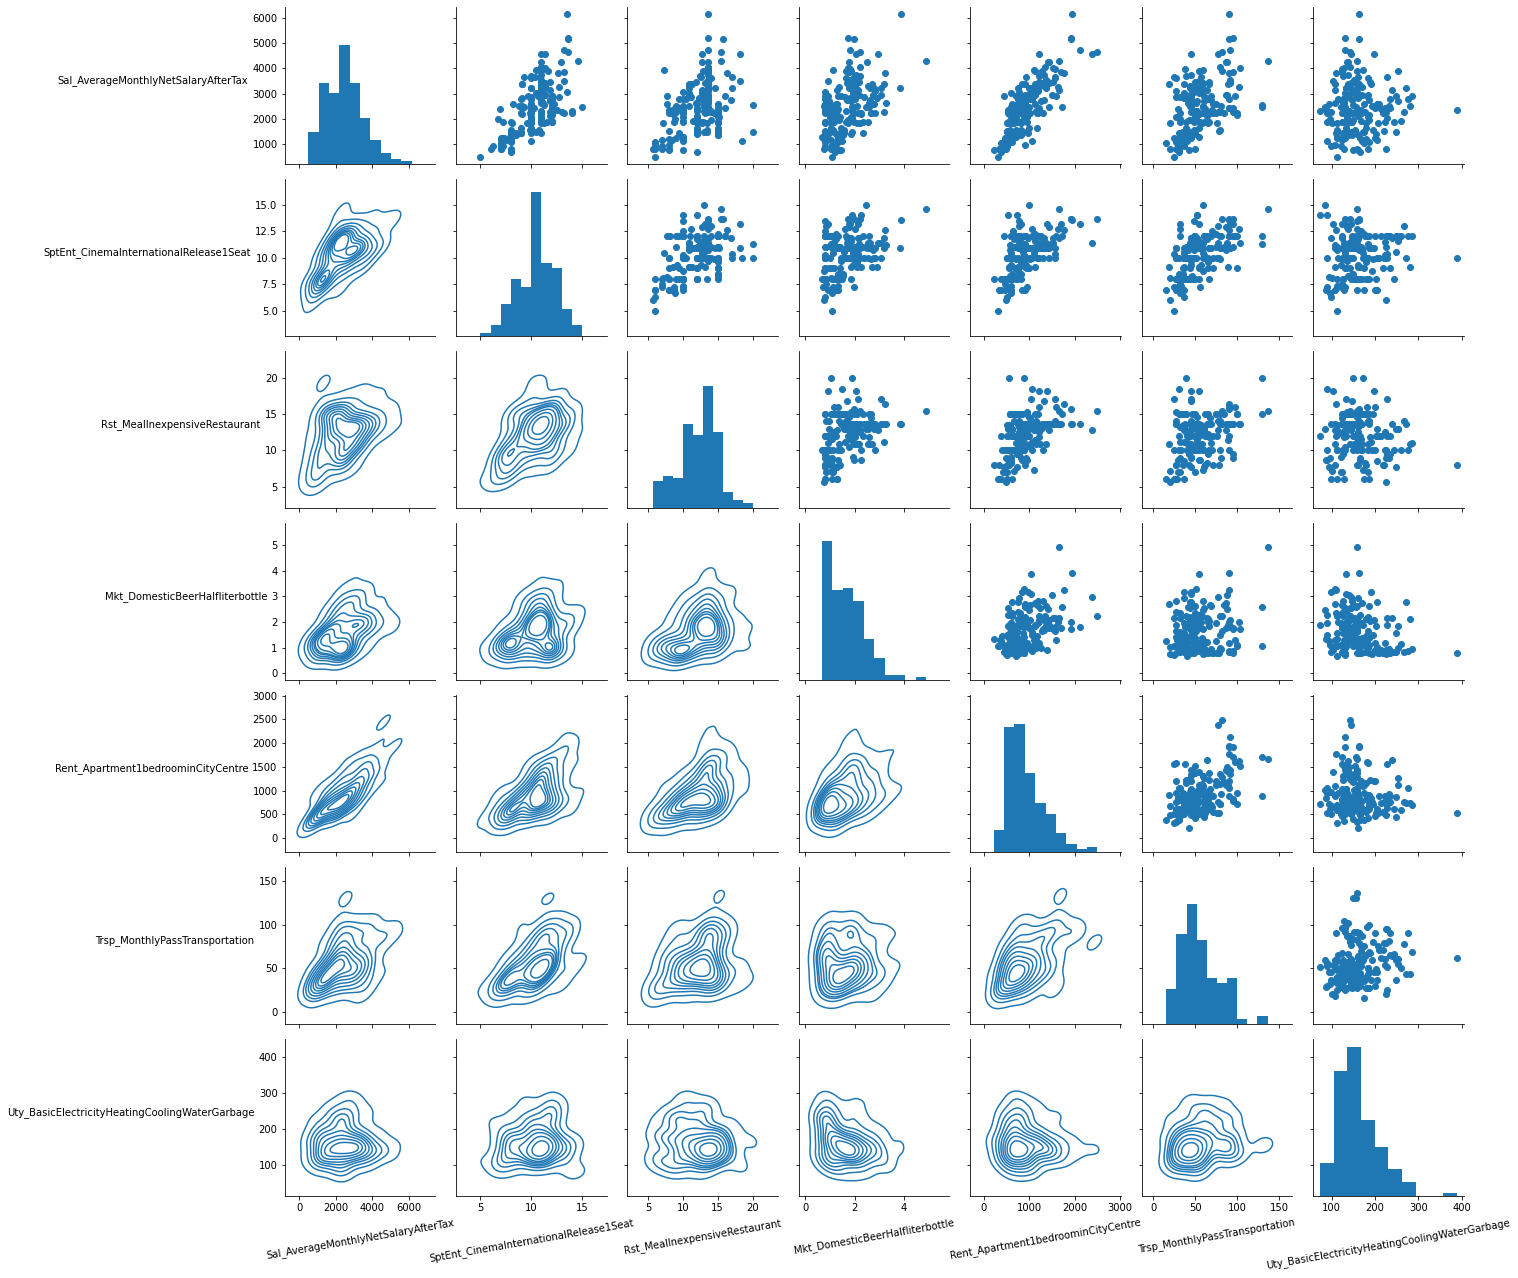

In [27]:
Salary_df = df[df['Cost_index'] !=0]
Salary_df = Salary_df[[
 'Sal_AverageMonthlyNetSalaryAfterTax',
 'SptEnt_CinemaInternationalRelease1Seat',
 'Rst_MealInexpensiveRestaurant',
 'Mkt_DomesticBeerHalfliterbottle',
 'Rent_Apartment1bedroominCityCentre',
'Trsp_MonthlyPassTransportation',
'Uty_BasicElectricityHeatingCoolingWaterGarbage']]

g = sns.PairGrid(Salary_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation =0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
    
fig = ax.get_figure()
fig.savefig("SalaryPairGrid.jpg")

###### From the Salary chart above, we can see
1. 'Sal_AverageMonthlyNetSalaryAfterTax' is highly correlated with 'Rst_MealInexpensiveRestaurant'.
2. 'SptEnt_CinemaInternationalRelease1Seat' is highly correlated with 'Sal_AverageMonthlyNetSalaryAfterTax'.

<a id='cell27'></a>
#### 4.14 Label-Cost of Living Index

##### As we discovered above, there are 49 data points which do not have Cost_index. We will remove these data points and gerate KDE.

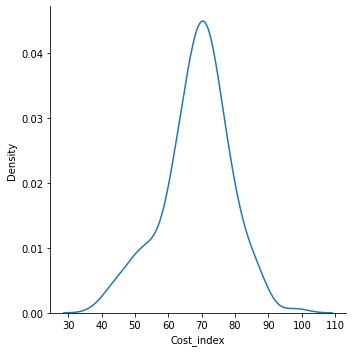

In [21]:
costIndex_df = df[df['Cost_index'] !=0]
sns.displot(costIndex_df, x="Cost_index", kind="kde")

<a id='cell28'></a>
### Other option for the Treatment of Missing Data

The other option: We can fill the missing label with the mean value of cost of living index in the surrounding areas. However, due to the volume of this data isn't big enough to find cost of living index in the surrounding areas. We do not adopt this option.

<span style="color: red;">Our Strategy: Remove the data points from dataset if their label is missing the value. These data will not be used for training and test dataset.</span> .

<a id='authors'></a>
#### Authors
Selina Nie